# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from fbprophet import Prophet

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import linkage, dendrogram 

import sys
sys.path.append('/mnt/home/roopa.sondur_outlook/custom-packages/python3')
import stockstats
from stockstats import StockDataFrame as Sdf

from nsepy import get_history
from datetime import date

import Technical_Indicators_v4 as ti

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#import random
#random.seed(7)

# PORTFOLIO CREATION

### Importing pandas_datareader and fix_yahoo_finance packages to download financial data from yahoo finance

In [2]:
from pandas_datareader import data as pdr

""" Yahoo! finance has decommissioned their historical data API, causing many programs that relied on it to stop working.
fix-yahoo-finance offers a temporary fix to the problem by scraping the data from Yahoo! finance and returns a 
Pandas DataFrame/Panel in the same format as pandas_datareader's get_data_yahoo() """

import fix_yahoo_finance as yf

""" Changing the functionality/implementation of pandas_datareader's get_data_yahoo() method 
of superclass by overriding in the subclass """

yf.pdr_override() 

### ind_nifty50list.csv contains the list of stocks for NIFTY50 index

In [3]:
df = pd.read_csv ('ind_nifty50list.csv')

# Sector-wise sorted list of stocks 
df.sort_values(by='Industry')

Company Name                  Industry  \
18                            Hero MotoCorp Ltd.                AUTOMOBILE   
14                            Eicher Motors Ltd.                AUTOMOBILE   
41                              Tata Motors Ltd.                AUTOMOBILE   
10                                    Bosch Ltd.                AUTOMOBILE   
33                      Maruti Suzuki India Ltd.                AUTOMOBILE   
5                                Bajaj Auto Ltd.                AUTOMOBILE   
32                      Mahindra & Mahindra Ltd.                AUTOMOBILE   
45                         UltraTech Cement Ltd.  CEMENT & CEMENT PRODUCTS   
1                            Ambuja Cements Ltd.  CEMENT & CEMENT PRODUCTS   
30                          Larsen & Toubro Ltd.              CONSTRUCTION   
2                              Asian Paints Ltd.            CONSUMER GOODS   
23                                    I T C Ltd.            CONSUMER GOODS   
21                       Hindustan Unilever Ltd.            CONSUMER GOODS   
20          Hindustan Petroleum Corporation Ltd.                    ENERGY   
34                                     NTPC Ltd.                    ENERGY   
26                   Indian Oil Corporation Ltd.                    ENERGY   
37                      Reliance Industries Ltd.                    ENERGY   
35            Oil & Natural Gas Corporation Ltd.                    ENERGY   
36          Power Grid Corporation of India Ltd.                    ENERGY   
15                             GAIL (India) Ltd.                    ENERGY   
7              Bharat Petroleum Corporation Ltd.                    ENERGY   
44                                      UPL Ltd.  FERTILISERS & PESTICIDES   
38                           State Bank of India        FINANCIAL SERVICES   
4                                 Axis Bank Ltd.        FINANCIAL SERVICES   
6                             Bajaj Finance Ltd.        FINANCIAL SERVICES   
29                      Kotak Mahindra Bank Ltd.        FINANCIAL SERVICES   
17                                HDFC Bank Ltd.        FINANCIAL SERVICES   
27                            IndusInd Bank Ltd.        FINANCIAL SERVICES   
25               Indiabulls Housing Finance Ltd.        FINANCIAL SERVICES   
48                                 Yes Bank Ltd.        FINANCIAL SERVICES   
22  Housing Development Finance Corporation Ltd.        FINANCIAL SERVICES   
24                               ICICI Bank Ltd.        FINANCIAL SERVICES   
28                                  Infosys Ltd.                        IT   
40                Tata Consultancy Services Ltd.                        IT   
16                         HCL Technologies Ltd.                        IT   
47                                    Wipro Ltd.                        IT   
43                            Tech Mahindra Ltd.                        IT   
49            Zee Entertainment Enterprises Ltd.     MEDIA & ENTERTAINMENT   
19                      Hindalco Industries Ltd.                    METALS   
12                               Coal India Ltd.                    METALS   
42                               Tata Steel Ltd.                    METALS   
46                                  Vedanta Ltd.                    METALS   
39            Sun Pharmaceutical Industries Ltd.                    PHARMA   
13                 Dr. Reddy's Laboratories Ltd.                    PHARMA   
11                                    Cipla Ltd.                    PHARMA   
3                          Aurobindo Pharma Ltd.                    PHARMA   
31                                    Lupin Ltd.                    PHARMA   
0     Adani Ports and Special Economic Zone Ltd.                  SERVICES   
9                           Bharti Infratel Ltd.                   TELECOM   
8                             Bharti Airtel Ltd.                   TELECOM   

        Symbol Series     ISIN Code  
18  HEROMOTOCO     

### For yahoo data source adding .NS for NSE stock exchange prices 

In [4]:
list_stocks = df['Symbol'].values

tickers  =  []
for ticker in list_stocks:
    tickers = tickers +  [ticker + '.NS']
tickers

['ADANIPORTS.NS',
 'AMBUJACEM.NS',
 'ASIANPAINT.NS',
 'AUROPHARMA.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'INFRATEL.NS',
 'BOSCHLTD.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDPETRO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ITC.NS',
 'ICICIBANK.NS',
 'IBULHSGFIN.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LUPIN.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'VEDL.NS',
 'WIPRO.NS',
 'YESBANK.NS',
 'ZEEL.NS']

In [5]:
""" Taking 5 years historic data for creating clusters based on daily-returns of stocks for NIFTY50 """

# Date format is 'yyyy-mm-dd'

start_date = '2013-01-01' 
end_date = '2018-05-01' 

In [6]:
panel_data =  pdr.get_data_yahoo(tickers, start_date, end_date)

[*********************100%***********************]  50 of 50 downloaded


In [7]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1313 (major_axis) x 50 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2013-01-01 00:00:00 to 2018-04-30 00:00:00
Minor_axis axis: ADANIPORTS.NS to ZEEL.NS

### Getting the 'Adjusted Close' prices and creating a dataframe

In [8]:
adj_close = panel_data.loc['Adj Close']
adj_close.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01     134.805450    184.509155     393.388977      91.947716   
2013-01-02     135.441299    186.749207     388.844116      95.868973   
2013-01-03     135.294571    188.760681     391.045349      96.106636   
2013-01-04     134.511963    188.440704     391.516754      95.845215   
2013-01-07     137.006561    186.383499     390.836365      95.821457   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01  1168.437134            NaN     101.747940     312.294800   
2013-01-02   237.828903            NaN     100.630241     311.276733   
2013-01-03  1191.802490            NaN     103.339737     318.015167   
2013-01-04   236.474152            NaN     103.388054     317.045593   
2013-01-07   235.428085            NaN     103.235405     316.851685   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
Date                                   ...                                    
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-07  9040.283203  81.454163     ...         306.359711    370.341492   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
Date                                                                        
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-07  533.325439  206.360641    2007.301880  129.611343  161.287842   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
Date                                            
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-07  171.996628   74.853645  215.261612  

[5 rows x 50 columns]

### Get the dates for all 7 days in a week for the specified 2 years

In [9]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='D')
all_weekdays

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2018-04-22', '2018-04-23', '2018-04-24', '2018-04-25',
               '2018-04-26', '2018-04-27', '2018-04-28', '2018-04-29',
               '2018-04-30', '2018-05-01'],
              dtype='datetime64[ns]', length=1947, freq='D')

In [10]:
# Reindexing the adj_close df with all_weekdays df to create a room for all non-trading days

adj_close = adj_close.reindex(all_weekdays)
adj_close.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
2013-01-01     134.805450    184.509155     393.388977      91.947716   
2013-01-02     135.441299    186.749207     388.844116      95.868973   
2013-01-03     135.294571    188.760681     391.045349      96.106636   
2013-01-04     134.511963    188.440704     391.516754      95.845215   
2013-01-05            NaN           NaN            NaN            NaN   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
2013-01-01  1168.437134            NaN     101.747940     312.294800   
2013-01-02   237.828903            NaN     100.630241     311.276733   
2013-01-03  1191.802490            NaN     103.339737     318.015167   
2013-01-04   236.474152            NaN     103.388054     317.045593   
2013-01-05          NaN            NaN            NaN            NaN   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-05          NaN        NaN     ...                NaN           NaN   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-05         NaN         NaN            NaN         NaN         NaN   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-05         NaN         NaN         NaN  

[5 rows x 50 columns]

In [11]:
# Check for missing values

print('Number of missing values across columns:\n', adj_close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS     634
AMBUJACEM.NS      634
ASIANPAINT.NS     634
AUROPHARMA.NS     634
AXISBANK.NS       692
BAJAJ-AUTO.NS    1127
BAJFINANCE.NS     634
BHARTIARTL.NS     634
BOSCHLTD.NS       634
BPCL.NS           634
CIPLA.NS          634
COALINDIA.NS      634
DRREDDY.NS        634
EICHERMOT.NS      634
GAIL.NS           634
HCLTECH.NS        634
HDFC.NS           634
HDFCBANK.NS       634
HEROMOTOCO.NS     634
HINDALCO.NS       634
HINDPETRO.NS      634
HINDUNILVR.NS     634
IBULHSGFIN.NS     774
ICICIBANK.NS      634
INDUSINDBK.NS     634
INFRATEL.NS       634
INFY.NS           634
IOC.NS            634
ITC.NS            634
KOTAKBANK.NS      634
LT.NS             634
LUPIN.NS          634
M&M.NS            634
MARUTI.NS         634
NTPC.NS           634
ONGC.NS           634
POWERGRID.NS      634
RELIANCE.NS       634
SBIN.NS           652
SUNPHARMA.NS      634
TATAMOTORS.NS     634
TATASTEEL.NS      634
TCS.NS            634
TECHM.NS    

### For all the holidays where there is no data - filling it with the forward and backward filling methods

In [12]:
# Forward fill
adj_close = adj_close.fillna(method='ffill')

# Backward fill
adj_close = adj_close.fillna(method = 'bfill')

In [13]:
adj_close.to_csv('stocks_adj_close.csv')
adj_close.head(10)

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
2013-01-01     134.805450    184.509155     393.388977      91.947716   
2013-01-02     135.441299    186.749207     388.844116      95.868973   
2013-01-03     135.294571    188.760681     391.045349      96.106636   
2013-01-04     134.511963    188.440704     391.516754      95.845215   
2013-01-05     134.511963    188.440704     391.516754      95.845215   
2013-01-06     134.511963    188.440704     391.516754      95.845215   
2013-01-07     137.006561    186.383499     390.836365      95.821457   
2013-01-08     134.463043    184.692017     390.814178      95.393677   
2013-01-09     132.213013    180.120422     388.150391      93.397392   
2013-01-10     132.848923    175.320267     388.021362      90.711929   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
2013-01-01  1168.437134    2300.317871     101.747940     312.294800   
2013-01-02   237.828903    2300.317871     100.630241     311.276733   
2013-01-03  1191.802490    2300.317871     103.339737     318.015167   
2013-01-04   236.474152    2300.317871     103.388054     317.045593   
2013-01-05   236.474152    2300.317871     103.388054     317.045593   
2013-01-06   236.474152    2300.317871     103.388054     317.045593   
2013-01-07   235.428085    2300.317871     103.235405     316.851685   
2013-01-08   233.275879    2300.317871     103.141808     320.245148   
2013-01-09  1157.247681    2300.317871     102.202850     323.590118   
2013-01-10  1172.981689    2300.317871     104.752007     320.002777   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-05  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-06  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-07  9040.283203  81.454163     ...         306.359711    370.341492   
2013-01-08  8991.928711  80.450737     ...         307.239502    363.998962   
2013-01-09  8925.016602  81.496635     ...         320.149200    354.717987   
2013-01-10  9035.247070  80.471642     ...         326.359924    353.205994   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-05  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-06  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-07  533.325439  206.360641    2007.301880  129.611343  161.287842   
2013-01-08  535.549744  206.216400    1986.104614  129.941879  158.939941   
2013-01-09  525.808594  209.110199    1930.234131  128.430908  156.671616   
2013-01-10  518.312195  217.168304    1868.068604  129.280838  153.846222   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-05  171.444412   73.471512  218.925644  
2013-01-06  171.444412   73.471512  218.925644  
2013-01-07  171.996628   74.853645  215.261612  
2013-01-08  169.108414   75.063988  215.984787  
2013-01-09  168.641190   75.747528  215.358032  
2013-01-10  168.025314   77.437660  217.720367  

[10 rows x 50 columns]

### Caluclating daily-returns by ratio of ((current adj_close/ previous adj_close) - 1)

In [14]:
daily_returns = (adj_close / adj_close.shift(1)) - 1
daily_returns.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
2013-01-01            NaN           NaN            NaN            NaN   
2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2013-01-03      -0.001083      0.010771       0.005661       0.002479   
2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
2013-01-05       0.000000      0.000000       0.000000       0.000000   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
2013-01-01          NaN            NaN            NaN            NaN   
2013-01-02    -0.796456            0.0      -0.010985      -0.003260   
2013-01-03     4.011176            0.0       0.026925       0.021648   
2013-01-04    -0.801583            0.0       0.000468      -0.003049   
2013-01-05     0.000000            0.0       0.000000       0.000000   

            BOSCHLTD.NS   BPCL.NS    ...     TATAMOTORS.NS  TATASTEEL.NS  \
2013-01-01          NaN       NaN    ...               NaN           NaN   
2013-01-02     0.009347  0.028484    ...          0.003944     -0.000113   
2013-01-03    -0.007023 -0.000549    ...          0.000315      0.009470   
2013-01-04    -0.006669  0.021166    ...         -0.008487     -0.019896   
2013-01-05     0.000000  0.000000    ...          0.000000      0.000000   

              TCS.NS  TECHM.NS  ULTRACEMCO.NS    UPL.NS   VEDL.NS  WIPRO.NS  \
2013-01-01       NaN       NaN            NaN       NaN       NaN       NaN   
2013-01-02 -0.000672  0.006478       0.006155 -0.005287  0.021652 -0.007936   
2013-01-03  0.013694  0.001754      -0.005110  0.038725  0.007393  0.010286   
2013-01-04  0.014524  0.001224       0.008420 -0.006579 -0.013209  0.014706   
2013-01-05  0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   

            YESBANK.NS   ZEEL.NS  
2013-01-01         NaN       NaN  
2013-01-02    0.022746  0.034923  
2013-01-03    0.008917  0.000216  
2013-01-04   -0.006400 -0.017950  
2013-01-05    0.000000  0.000000  

[5 rows x 50 columns]

### Replace all the NaNs in the first row with zero (as there is no previous value to calculate daily-returns)

In [15]:
daily_returns.iloc[0, :] = 0
daily_returns.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
2013-01-01       0.000000      0.000000       0.000000       0.000000   
2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2013-01-03      -0.001083      0.010771       0.005661       0.002479   
2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
2013-01-05       0.000000      0.000000       0.000000       0.000000   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
2013-01-01     0.000000            0.0       0.000000       0.000000   
2013-01-02    -0.796456            0.0      -0.010985      -0.003260   
2013-01-03     4.011176            0.0       0.026925       0.021648   
2013-01-04    -0.801583            0.0       0.000468      -0.003049   
2013-01-05     0.000000            0.0       0.000000       0.000000   

            BOSCHLTD.NS   BPCL.NS    ...     TATAMOTORS.NS  TATASTEEL.NS  \
2013-01-01     0.000000  0.000000    ...          0.000000      0.000000   
2013-01-02     0.009347  0.028484    ...          0.003944     -0.000113   
2013-01-03    -0.007023 -0.000549    ...          0.000315      0.009470   
2013-01-04    -0.006669  0.021166    ...         -0.008487     -0.019896   
2013-01-05     0.000000  0.000000    ...          0.000000      0.000000   

              TCS.NS  TECHM.NS  ULTRACEMCO.NS    UPL.NS   VEDL.NS  WIPRO.NS  \
2013-01-01  0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   
2013-01-02 -0.000672  0.006478       0.006155 -0.005287  0.021652 -0.007936   
2013-01-03  0.013694  0.001754      -0.005110  0.038725  0.007393  0.010286   
2013-01-04  0.014524  0.001224       0.008420 -0.006579 -0.013209  0.014706   
2013-01-05  0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   

            YESBANK.NS   ZEEL.NS  
2013-01-01    0.000000  0.000000  
2013-01-02    0.022746  0.034923  
2013-01-03    0.008917  0.000216  
2013-01-04   -0.006400 -0.017950  
2013-01-05    0.000000  0.000000  

[5 rows x 50 columns]

### Data preparation for Unsupervised Learning 

### To create a diversified portfolio of stocks we will cluster them and then identify one stock from each cluster that is closest to the centroid of the respective cluster 

In [16]:
# Calculating stdev for all stocks

daily_returns.std()

ADANIPORTS.NS    0.019699
AMBUJACEM.NS     0.014376
ASIANPAINT.NS    0.013365
AUROPHARMA.NS    0.019684
AXISBANK.NS      0.887136
BAJAJ-AUTO.NS    0.009342
BAJFINANCE.NS    0.018152
BHARTIARTL.NS    0.015638
BOSCHLTD.NS      0.013281
BPCL.NS          0.017496
CIPLA.NS         0.013087
COALINDIA.NS     0.014098
DRREDDY.NS       0.013953
EICHERMOT.NS     0.016279
GAIL.NS          0.015042
HCLTECH.NS       0.014061
HDFC.NS          0.013769
HDFCBANK.NS      0.010323
HEROMOTOCO.NS    0.012470
HINDALCO.NS      0.020703
HINDPETRO.NS     0.021201
HINDUNILVR.NS    0.012267
IBULHSGFIN.NS    0.017961
ICICIBANK.NS     0.016886
INDUSINDBK.NS    0.014873
INFRATEL.NS      0.017921
INFY.NS          0.013949
IOC.NS           0.017142
ITC.NS           0.012989
KOTAKBANK.NS     0.013027
LT.NS            0.014599
LUPIN.NS         0.014379
M&M.NS           0.013331
MARUTI.NS        0.013243
NTPC.NS          0.013441
ONGC.NS          0.015712
POWERGRID.NS     0.011581
RELIANCE.NS      0.012981
SBIN.NS     

In [17]:
# Calculating expected mean for all stocks

daily_returns.mean()

ADANIPORTS.NS    0.000761
AMBUJACEM.NS     0.000261
ASIANPAINT.NS    0.000663
AUROPHARMA.NS    0.001191
AXISBANK.NS      0.155167
BAJAJ-AUTO.NS    0.000172
BAJFINANCE.NS    0.001669
BHARTIARTL.NS    0.000261
BOSCHLTD.NS      0.000474
BPCL.NS          0.000993
CIPLA.NS         0.000288
COALINDIA.NS     0.000189
DRREDDY.NS       0.000189
EICHERMOT.NS     0.001362
GAIL.NS          0.000468
HCLTECH.NS       0.000790
HDFC.NS          0.000548
HDFCBANK.NS      0.000609
HEROMOTOCO.NS    0.000497
HINDALCO.NS      0.000525
HINDPETRO.NS     0.001461
HINDUNILVR.NS    0.000658
IBULHSGFIN.NS    0.001106
ICICIBANK.NS     0.000466
INDUSINDBK.NS    0.000897
INFRATEL.NS      0.000459
INFY.NS          0.000609
IOC.NS           0.000921
ITC.NS           0.000345
KOTAKBANK.NS     0.000764
LT.NS            0.000503
LUPIN.NS         0.000260
M&M.NS           0.000460
MARUTI.NS        0.001009
NTPC.NS          0.000227
ONGC.NS          0.000250
POWERGRID.NS     0.000434
RELIANCE.NS      0.000561
SBIN.NS     

In [18]:
x = daily_returns.std().tolist() # standard deviation of daily_returns of each stock
y = daily_returns.mean().tolist() # expected mean or average daily_returns of each stock

### Clustering

In [19]:
from sklearn.cluster import KMeans

data = pd.DataFrame({'std_dev':x, 'avg':y})
#data

#Convert DataFrame to matrix
data_mat = data.as_matrix()

cluster_range = range(1, 15)
cluster_errors = []

for num in cluster_range:
    k_means = KMeans(n_clusters=num, random_state=7)
    k_means.fit(data_mat)
    cluster_errors.append(k_means.inertia_) # within sum of square errors

clusters_df = pd.DataFrame({"num_of_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df

cluster_errors  num_of_clusters
0         0.768626                1
1         0.000429                2
2         0.000117                3
3         0.000077                4
4         0.000044                5
5         0.000028                6
6         0.000022                7
7         0.000016                8
8         0.000013                9
9         0.000011               10
10        0.000009               11
11        0.000007               12
12        0.000006               13
13        0.000006               14

Text(0.5,1,'Cluster_errors v/s No. of clusters')

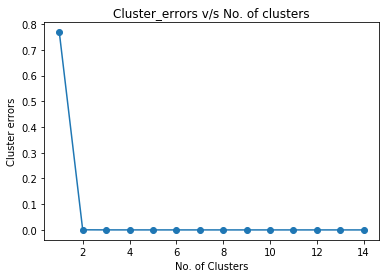

In [20]:
# Elbow plot to find the optimal number of clusters
plt.plot(clusters_df.num_of_clusters, clusters_df.cluster_errors, marker = "o" )

# Title and axis
plt.xlabel('No. of Clusters')
plt.ylabel('Cluster errors')
plt.title('Cluster_errors v/s No. of clusters')

In [21]:
# After No. of clusters=5, the cluster errors converge

num_clusters = 5  

k_means = KMeans(n_clusters=num_clusters, random_state=7)
k_means.fit(data_mat)

# Cluster label for each stock
labels = k_means.labels_
cluster_labels = labels.tolist()
print('\ncluster_labels\n', cluster_labels)

# To find unique labels
unique_labels = list(set(cluster_labels))
print('\nunique_labels\n', unique_labels)

# Cluster centroids
cluster_centroids = np.array(k_means.cluster_centers_)
print('\n(x,y) coordinates of cluster_centroids \n', cluster_centroids)

# results
results = pd.DataFrame([data.index, labels]).T
results.columns = ['Ticker_index', 'Cluster_label']


# Dataframe with Ticker_name, Ticker_index, Cluster_label
ticker_df = pd.DataFrame({'Ticker_name':tickers})
result_df = pd.DataFrame()
result_df = pd.concat([ticker_df, results], axis=1)
#result_df

# Sort result_df by cluster label
sorted_df = result_df.sort_values('Cluster_label')
sorted_df



cluster_labels
 [3, 4, 0, 3, 1, 0, 2, 4, 0, 2, 0, 4, 4, 2, 4, 4, 4, 0, 0, 3, 3, 0, 2, 2, 4, 2, 4, 2, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 2, 4, 2, 2, 0, 4, 4, 2, 3, 0, 3, 4]

unique_labels
 [0, 1, 2, 3, 4]

(x,y) coordinates of cluster_centroids 
 [[5.11968427e-04 1.24587354e-02]
 [1.55167402e-01 8.87136240e-01]
 [8.23221637e-04 1.77368292e-02]
 [9.27064896e-04 2.07935861e-02]
 [4.59177274e-04 1.45995786e-02]]


Ticker_name  Ticker_index  Cluster_label
18  HEROMOTOCO.NS            18              0
34        NTPC.NS            34              0
33      MARUTI.NS            33              0
32         M&M.NS            32              0
29   KOTAKBANK.NS            29              0
28        INFY.NS            28              0
21  HINDUNILVR.NS            21              0
37    RELIANCE.NS            37              0
17    HDFCBANK.NS            17              0
42   TATASTEEL.NS            42              0
36   POWERGRID.NS            36              0
47       WIPRO.NS            47              0
2   ASIANPAINT.NS             2              0
5   BAJAJ-AUTO.NS             5              0
8   BHARTIARTL.NS             8              0
10    BOSCHLTD.NS            10              0
4     AXISBANK.NS             4              1
45  ULTRACEMCO.NS            45              2
38        SBIN.NS            38              2
27  INDUSINDBK.NS            27              2
40         TCS.NS            40              2
25  IBULHSGFIN.NS            25              2
23         ITC.NS            23              2
6   BAJFINANCE.NS             6              2
41  TATAMOTORS.NS            41              2
9     INFRATEL.NS             9              2
13     DRREDDY.NS            13              2
22        HDFC.NS            22              2
48     YESBANK.NS            48              3
20   HINDPETRO.NS            20              3
19    HINDALCO.NS            19              3
46        VEDL.NS            46              3
3   AUROPHARMA.NS             3              3
0   ADANIPORTS.NS             0              3
39   SUNPHARMA.NS            39              4
43       TECHM.NS            43              4
44         UPL.NS            44              4
24   ICICIBANK.NS            24              4
31       LUPIN.NS            31              4
30          LT.NS            30              4
26         IOC.NS            26              4
16     HCLTECH.NS            16              4
15        GAIL.NS            15              4
14   EICHERMOT.NS            14              4
12   COALINDIA.NS            12              4
11       CIPLA.NS            11              4
7         BPCL.NS             7              4
1    AMBUJACEM.NS             1              4
35        ONGC.NS            35              4
49        ZEEL.NS            49              4

In [22]:
# Compute minimum distances between centroid of each cluster and set of points in the respective cluster

from sklearn.metrics import pairwise_distances_argmin_min

closest_ticker_ids = []
ticker_indices_within_i_cluster = []

# Converting matrix 'data_mat' to list
data_list = data_mat.tolist()
#print('type(data_list)', type(data_list))
#print('len(data_list)', len(data_list))
#print('data_list', data_list)

for i in range(0, num_clusters):
    
    clust_centroid = cluster_centroids[i]
    #print('\nCluster centroid for cluster {}'.format(i))
    #print(clust_centroid)
    
    ticker_indices_within_i_cluster = result_df.loc[result_df['Cluster_label'] == i, 'Ticker_index'].tolist()
    print('\nTicker indices in cluster {}'.format(i))
    print(ticker_indices_within_i_cluster)   

    one_cluster_data_mat = np.zeros((len(ticker_indices_within_i_cluster), cluster_centroids.shape[1]))
    #print('\nInitially one_cluster_data_mat has zero values\n', one_cluster_data_mat)
    
    for row_num, data_idx in enumerate(ticker_indices_within_i_cluster):
        one_row = data_mat[data_idx]
        #print('\none_row', one_row)
        one_cluster_data_mat[row_num] = one_row
        #print('\none_cluster_data_mat[row_num]', one_cluster_data_mat)
    #print('\n')    
    #print('one_cluster_data_mat filled with co-ordinates of ticker_ids of a cluster\n', one_cluster_data_mat)

    closest, distances = pairwise_distances_argmin_min(clust_centroid.reshape(1, -1), one_cluster_data_mat)    
    closest_idx_in_one_cluster_data_mat = closest[0]
    closest_data_row_num = ticker_indices_within_i_cluster[closest_idx_in_one_cluster_data_mat]    
    #print('\nclosest_data_row_num', closest_data_row_num)
    
    data_id = data_mat[closest_data_row_num]
    data_id_list = data_id.tolist()
    #print('\ndata_id_list', data_id_list)
    #print('\ntype(data_id_list)', type(data_id_list))    
   
    ticker_id = data_list.index(data_id_list)
    #print('\nticker_id', ticker_id)
   
    closest_ticker_ids.append(ticker_id)



Ticker indices in cluster 0
[2, 5, 8, 10, 17, 18, 21, 28, 29, 32, 33, 34, 36, 37, 42, 47]

Ticker indices in cluster 1
[4]

Ticker indices in cluster 2
[6, 9, 13, 22, 23, 25, 27, 38, 40, 41, 45]

Ticker indices in cluster 3
[0, 3, 19, 20, 46, 48]

Ticker indices in cluster 4
[1, 7, 11, 12, 14, 15, 16, 24, 26, 30, 31, 35, 39, 43, 44, 49]


In [23]:
print('\n\n*************** We can create stock-portfolio of the below ticker_ids ***************')
print('\nFor cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are {}'.format(closest_ticker_ids))




*************** We can create stock-portfolio of the below ticker_ids ***************

For cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are [18, 4, 9, 48, 30]


In [24]:
# ticker_names
ticker_names = pd.DataFrame()

for ticker_id in closest_ticker_ids:
    temp = pd.DataFrame(result_df.loc[result_df['Ticker_index'] == ticker_id, 'Ticker_name'])
    #print(temp)
    ticker_names = ticker_names.append(temp)

ticker_names = ticker_names.reset_index()
# Rename index column as 'Cluster_No.'
ticker_names.index.name = 'Cluster_No.'
ticker_names.columns = ['Ticker_index', 'Ticker_name']


# Portfolio of stocks

In [25]:
# Writing the ticker names of the portfolio into .csv file
ticker_names.to_csv('Portfolio_stocks.csv')
print('Portfolio of stocks\n')
ticker_names

Portfolio of stocks



Ticker_index    Ticker_name
Cluster_No.                             
0                      18  HEROMOTOCO.NS
1                       4    AXISBANK.NS
2                       9    INFRATEL.NS
3                      48     YESBANK.NS
4                      30          LT.NS

# Investment startegy:
# How to distribute funds among the portfolio of stocks to get maximum returns with minimum risk?

# Portfolio Optimization

In [26]:
portfolio_df = pd.read_csv('Portfolio_stocks.csv', index_col=0)
print('Portfolio of stocks')
portfolio_df

Portfolio of stocks


Ticker_index    Ticker_name
Cluster_No.                             
0                      18  HEROMOTOCO.NS
1                       4    AXISBANK.NS
2                       9    INFRATEL.NS
3                      48     YESBANK.NS
4                      30          LT.NS

In [27]:
port_stocks = portfolio_df['Ticker_name'].values.tolist()
port_stocks

['HEROMOTOCO.NS', 'AXISBANK.NS', 'INFRATEL.NS', 'YESBANK.NS', 'LT.NS']

In [28]:
adj_close_df = pd.read_csv('stocks_adj_close.csv', index_col=0)[port_stocks]
adj_close_df.head()

HEROMOTOCO.NS  AXISBANK.NS  INFRATEL.NS  YESBANK.NS       LT.NS
2013-01-01    1648.823853  1168.437134   175.099014   71.661201  646.220032
2013-01-02    1655.775635   237.828903   178.419449   73.291229  656.022888
2013-01-03    1640.655029  1191.802490   180.943008   73.944748  650.972412
2013-01-04    1640.655029   236.474152   183.422272   73.471512  647.453186
2013-01-05    1640.655029   236.474152   183.422272   73.471512  647.453186



***************Analysis of individual stock in the portfolio***************

The annualised mean return of stock HEROMOTOCO.NS is 0.13, and the annualised volatility (standard deviation) is 0.2

The annualised mean return of stock AXISBANK.NS is 39.12, and the annualised volatility (standard deviation) is 14.09

The annualised mean return of stock INFRATEL.NS is 0.12, and the annualised volatility (standard deviation) is 0.28

The annualised mean return of stock YESBANK.NS is 0.26, and the annualised volatility (standard deviation) is 0.33

The annualised mean return of stock LT.NS is 0.13, and the annualised volatility (standard deviation) is 0.23


******************************For the entire Portfolio******************************

Portfolio expected annualised return is 7.95 and volatility is 2.82

*************************************************************************************


Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual 

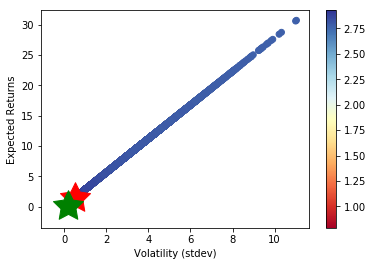

In [29]:


print('\n\n***************Analysis of individual stock in the portfolio***************')
for i in range(0, len(port_stocks)):

    returns = adj_close_df.iloc[:, i].pct_change()

    mean_return = returns.mean()
    return_stdev = returns.std()

    annualised_return = round(mean_return * 252, 2) # 252 trading days in an year
    annualised_stdev = round(return_stdev * np.sqrt(252), 2)

    print ('\nThe annualised mean return of stock {} is {}, and the annualised volatility (standard deviation) is {}'
           .format(port_stocks[i], annualised_return, annualised_stdev))
    
    
""" Similarly, calculate the expected return and volatility (standard deviation) for 
the entire portfolio of stocks. This will capture the benefits of diversification of less than perfect correlation 
between the stocks in the portfolio. """

""" We need our first input, the weights of the stocks in the portfolio – that is, 
how much of each stock do we hold as a percentage of the entire portfolio holdings.
Lets initially assume equal weights"(0.20 in our case) for all the 5 stocks in this portfolio. """

""" We can calculate the portfolio expected return and volatility as follows: """

#convert daily stock prices into daily returns
returns = adj_close_df.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set array holding portfolio weights of each stock
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])
 
#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252, 2)

#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252), 2)
 
print('\n\n******************************For the entire Portfolio******************************')
print('\nPortfolio expected annualised return is {} and volatility is {}'.format(portfolio_return, portfolio_std_dev))
print('\n*************************************************************************************\n\n')    
    
"""We now know the expected return and volatility of our current portfolio. 
But what if we aren’t happy with the level of volatility of our current portfolio and would like to reduce it? 
What if we are willing to take on more risk in search of a higher expected return? 
How can we rearrange the weight of each stock in our portfolio to achieve these goals?"""


"""We can use Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual stocks 
(obviously making sure the weights sum to 100%) and then calculate the expected return, expected volatility and Sharpe Ratio 
for each of the randomly generated portfolios."""

print('Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual stocks\n')

#convert daily stock prices into daily returns
returns = adj_close_df.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set number of runs of random portfolio weights
num_portfolios = 25000
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(port_stocks)-1, num_portfolios))
 
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
 
"""convert results array to Pandas DataFrame"""
results_frame = pd.DataFrame(results.T, columns=['Returns', 'Volatility', 'Sharpe_Ratio',
                                                 port_stocks[0], port_stocks[1],
                                                 port_stocks[2], port_stocks[3], port_stocks[4]])
 
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe_Ratio'].idxmax()]
print('type(max_sharpe_port)', type(max_sharpe_port))

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['Volatility'].idxmin()]
print('type(min_vol_port)', type(min_vol_port))

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.Volatility, results_frame.Returns, c=results_frame.Sharpe_Ratio, cmap='RdYlBu')
plt.xlabel('Volatility (stdev)')
plt.ylabel('Expected Returns')
plt.colorbar()

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker=(5,1,0), color='r',s=1000)

#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1], min_vol_port[0], marker=(5,1,0), color='g', s=1000)


### Type-1: "Portfolio with Maximum Sharpe Ratio" - RED star in the above plot

In [30]:
print('\n"Type-1: Portfolio with Maximum Sharpe Ratio"\n')
print('Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-1 portfolio\n')
print(max_sharpe_port)


"Type-1: Portfolio with Maximum Sharpe Ratio"

Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-1 portfolio

Returns          1.487504
Volatility       0.508260
Sharpe_Ratio     2.926660
HEROMOTOCO.NS    0.429144
AXISBANK.NS      0.033975
INFRATEL.NS      0.219546
YESBANK.NS       0.289620
LT.NS            0.027715
Name: 6059, dtype: float64


### Type-2: "Portfolio with Minimum Volatility" - GREEN star in the above plot

In [31]:
print('\n"Type-2: Portfolio with Minimum Volatility (stdev)"\n')
print('Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-2 portfolio\n')
print(min_vol_port)


"Type-2: Portfolio with Minimum Volatility (stdev)"

Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-2 portfolio

Returns          0.186482
Volatility       0.159394
Sharpe_Ratio     1.169949
HEROMOTOCO.NS    0.394668
AXISBANK.NS      0.001444
INFRATEL.NS      0.236881
YESBANK.NS       0.048733
LT.NS            0.318273
Name: 8309, dtype: float64


# Fetching data for each stock in the portfolio of stocks

In [32]:
trading_tickers = pd.read_csv('Portfolio_stocks.csv', index_col=0)
trading_tickers

Ticker_index    Ticker_name
Cluster_No.                             
0                      18  HEROMOTOCO.NS
1                       4    AXISBANK.NS
2                       9    INFRATEL.NS
3                      48     YESBANK.NS
4                      30          LT.NS

In [33]:
tickers_for_model = trading_tickers.Ticker_name.tolist()
tickers_for_model

['HEROMOTOCO.NS', 'AXISBANK.NS', 'INFRATEL.NS', 'YESBANK.NS', 'LT.NS']

### Fetching data for NIFTY 50 (^NSEI)

In [34]:
nse =  pdr.get_data_yahoo('^NSEI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [35]:
nse.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  5982.600098  6006.049805  5982.000000  5993.250000  5993.250000   
2013-01-03  6015.799805  6017.000000  5986.549805  6009.500000  6009.500000   
2013-01-04  6011.950195  6020.750000  5981.549805  6016.149902  6016.149902   
2013-01-07  6042.149902  6042.149902  5977.149902  5988.399902  5988.399902   
2013-01-08  5983.450195  6007.049805  5964.399902  6001.700195  6001.700195   

            Volume  
Date                
2013-01-02       0  
2013-01-03       0  
2013-01-04       0  
2013-01-07       0  
2013-01-08       0

In [36]:
nse = nse.reindex(all_weekdays)
nse.head()

Open         High          Low        Close    Adj Close  \
2013-01-01          NaN          NaN          NaN          NaN          NaN   
2013-01-02  5982.600098  6006.049805  5982.000000  5993.250000  5993.250000   
2013-01-03  6015.799805  6017.000000  5986.549805  6009.500000  6009.500000   
2013-01-04  6011.950195  6020.750000  5981.549805  6016.149902  6016.149902   
2013-01-05          NaN          NaN          NaN          NaN          NaN   

            Volume  
2013-01-01     NaN  
2013-01-02     0.0  
2013-01-03     0.0  
2013-01-04     0.0  
2013-01-05     NaN

In [37]:
nse.rename(columns={'Adj Close': 'NSE'}, inplace=True)
nse.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nse.head()

NSE
2013-01-01          NaN
2013-01-02  5993.250000
2013-01-03  6009.500000
2013-01-04  6016.149902
2013-01-05          NaN

### Fetching data for S&P 500 (^GSPC)

In [38]:
spy =  pdr.get_data_yahoo('^GSPC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [39]:
spy.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  1426.189941  1462.430054  1426.189941  1462.420044  1462.420044   
2013-01-03  1462.420044  1465.469971  1455.530029  1459.369995  1459.369995   
2013-01-04  1459.369995  1467.939941  1458.989990  1466.469971  1466.469971   
2013-01-07  1466.469971  1466.469971  1456.619995  1461.890015  1461.890015   
2013-01-08  1461.890015  1461.890015  1451.640015  1457.150024  1457.150024   

                Volume  
Date                    
2013-01-02  4202600000  
2013-01-03  3829730000  
2013-01-04  3424290000  
2013-01-07  3304970000  
2013-01-08  3601600000

In [40]:
spy = spy.reindex(all_weekdays)
spy.head()

Open         High          Low        Close    Adj Close  \
2013-01-01          NaN          NaN          NaN          NaN          NaN   
2013-01-02  1426.189941  1462.430054  1426.189941  1462.420044  1462.420044   
2013-01-03  1462.420044  1465.469971  1455.530029  1459.369995  1459.369995   
2013-01-04  1459.369995  1467.939941  1458.989990  1466.469971  1466.469971   
2013-01-05          NaN          NaN          NaN          NaN          NaN   

                  Volume  
2013-01-01           NaN  
2013-01-02  4.202600e+09  
2013-01-03  3.829730e+09  
2013-01-04  3.424290e+09  
2013-01-05           NaN

In [41]:
spy.rename(columns={'Adj Close': 'SPY'}, inplace=True)
spy.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
spy.head()

SPY
2013-01-01          NaN
2013-01-02  1462.420044
2013-01-03  1459.369995
2013-01-04  1466.469971
2013-01-05          NaN

### Fetching data for Dow Jones Industrial Average (^DJI)

In [42]:
dji =  pdr.get_data_yahoo('^DJI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [43]:
dji.head()

Open          High           Low         Close  \
Date                                                                 
2013-01-02  13104.299805  13412.709961  13104.299805  13412.549805   
2013-01-03  13413.009766  13430.599609  13358.299805  13391.360352   
2013-01-04  13391.049805  13447.110352  13376.230469  13435.209961   
2013-01-07  13436.129883  13436.129883  13343.320313  13384.290039   
2013-01-08  13377.419922  13377.419922  13293.129883  13328.849609   

               Adj Close     Volume  
Date                                 
2013-01-02  13412.549805  161430000  
2013-01-03  13391.360352  129630000  
2013-01-04  13435.209961  107590000  
2013-01-07  13384.290039  113120000  
2013-01-08  13328.849609  129570000

In [44]:
dji = dji.reindex(all_weekdays)
dji.head()

Open          High           Low         Close  \
2013-01-01           NaN           NaN           NaN           NaN   
2013-01-02  13104.299805  13412.709961  13104.299805  13412.549805   
2013-01-03  13413.009766  13430.599609  13358.299805  13391.360352   
2013-01-04  13391.049805  13447.110352  13376.230469  13435.209961   
2013-01-05           NaN           NaN           NaN           NaN   

               Adj Close       Volume  
2013-01-01           NaN          NaN  
2013-01-02  13412.549805  161430000.0  
2013-01-03  13391.360352  129630000.0  
2013-01-04  13435.209961  107590000.0  
2013-01-05           NaN          NaN

In [45]:
dji.rename(columns={'Adj Close': 'DJ'}, inplace=True)
dji.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
dji.head()

DJ
2013-01-01           NaN
2013-01-02  13412.549805
2013-01-03  13391.360352
2013-01-04  13435.209961
2013-01-05           NaN

### Fetching data for NASDAQ Composite (^IXIC)

In [46]:
nasdaq =  pdr.get_data_yahoo('^IXIC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [47]:
nasdaq.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  3091.330078  3112.649902  3083.489990  3112.260010  3112.260010   
2013-01-03  3108.489990  3118.179932  3092.280029  3100.570068  3100.570068   
2013-01-04  3100.879883  3108.439941  3090.810059  3101.659912  3101.659912   
2013-01-07  3089.169922  3102.350098  3083.879883  3098.810059  3098.810059   
2013-01-08  3098.459961  3103.389893  3076.600098  3091.810059  3091.810059   

                Volume  
Date                    
2013-01-02  2111300000  
2013-01-03  1769420000  
2013-01-04  1745140000  
2013-01-07  1702540000  
2013-01-08  1744380000

In [48]:
nasdaq = nasdaq.reindex(all_weekdays)
nasdaq.head()

Open         High          Low        Close    Adj Close  \
2013-01-01          NaN          NaN          NaN          NaN          NaN   
2013-01-02  3091.330078  3112.649902  3083.489990  3112.260010  3112.260010   
2013-01-03  3108.489990  3118.179932  3092.280029  3100.570068  3100.570068   
2013-01-04  3100.879883  3108.439941  3090.810059  3101.659912  3101.659912   
2013-01-05          NaN          NaN          NaN          NaN          NaN   

                  Volume  
2013-01-01           NaN  
2013-01-02  2.111300e+09  
2013-01-03  1.769420e+09  
2013-01-04  1.745140e+09  
2013-01-05           NaN

In [49]:
nasdaq.rename(columns={'Adj Close': 'NASDAQ'}, inplace=True)
nasdaq.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nasdaq.head()

NASDAQ
2013-01-01          NaN
2013-01-02  3112.260010
2013-01-03  3100.570068
2013-01-04  3101.659912
2013-01-05          NaN

### Fetching data for individual stocks from the portfolio of stocks

### Fetching data for Stock-1

In [50]:
print('Fetching historic stock data for {}'.format(tickers_for_model[0]))

Fetching historic stock data for HEROMOTOCO.NS


In [51]:
stock1_df =  pdr.get_data_yahoo(tickers_for_model[0], start_date, end_date)
stock1_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-01  1905.349976  1911.849976  1884.900024  1897.349976  1648.823853   
2013-01-02  1930.000000  1939.250000  1900.000000  1905.349976  1655.775635   
2013-01-03  1917.099976  1921.900024  1881.000000  1887.949951  1640.655029   
2013-01-04  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   
2013-01-07  1892.000000  1909.900024  1886.650024  1897.300049  1648.780396   

            Volume  
Date                
2013-01-01  104950  
2013-01-02  353260  
2013-01-03  334607  
2013-01-04  163808  
2013-01-07  371288

In [52]:
stock1_df = stock1_df.reindex(all_weekdays)
stock1_df.head()

Open         High          Low        Close    Adj Close  \
2013-01-01  1905.349976  1911.849976  1884.900024  1897.349976  1648.823853   
2013-01-02  1930.000000  1939.250000  1900.000000  1905.349976  1655.775635   
2013-01-03  1917.099976  1921.900024  1881.000000  1887.949951  1640.655029   
2013-01-04  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   
2013-01-05          NaN          NaN          NaN          NaN          NaN   

              Volume  
2013-01-01  104950.0  
2013-01-02  353260.0  
2013-01-03  334607.0  
2013-01-04  163808.0  
2013-01-05       NaN

In [53]:
# Fetching 'VWAP' from nsepy package for the same stock

stock1 = tickers_for_model[0].split('.')[0]
stock1

'HEROMOTOCO'

In [54]:
# Date format for nsepy package 'yyyy,mm,dd'

data = get_history(symbol=stock1, start=date(2013,1,1),  end=date(2018,5,1))
data['VWAP'].head()

Date
2013-01-01    1899.51
2013-01-02    1912.53
2013-01-03    1900.00
2013-01-04    1882.78
2013-01-07    1900.32
Name: VWAP, dtype: float64

In [55]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock1_df = stock1_df.join(data['VWAP'])
stock1_df.head()

Open         High          Low        Close    Adj Close  \
2013-01-01  1905.349976  1911.849976  1884.900024  1897.349976  1648.823853   
2013-01-02  1930.000000  1939.250000  1900.000000  1905.349976  1655.775635   
2013-01-03  1917.099976  1921.900024  1881.000000  1887.949951  1640.655029   
2013-01-04  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   
2013-01-05          NaN          NaN          NaN          NaN          NaN   

              Volume     VWAP  
2013-01-01  104950.0  1899.51  
2013-01-02  353260.0  1912.53  
2013-01-03  334607.0  1900.00  
2013-01-04  163808.0  1882.78  
2013-01-05       NaN      NaN

### Joining individual stock data with nse, spy, dji, nasdaq data

In [56]:
stock1_df = stock1_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock1_df = stock1_df.fillna(method='ffill')

# Backward fill
stock1_df = stock1_df.fillna(method = 'bfill')

stock1_df.head()

Open         High          Low        Close    Adj Close  \
2013-01-01  1905.349976  1911.849976  1884.900024  1897.349976  1648.823853   
2013-01-02  1930.000000  1939.250000  1900.000000  1905.349976  1655.775635   
2013-01-03  1917.099976  1921.900024  1881.000000  1887.949951  1640.655029   
2013-01-04  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   
2013-01-05  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   

              Volume     VWAP          NSE          SPY            DJ  \
2013-01-01  104950.0  1899.51  5993.250000  1462.420044  13412.549805   
2013-01-02  353260.0  1912.53  5993.250000  1462.420044  13412.549805   
2013-01-03  334607.0  1900.00  6009.500000  1459.369995  13391.360352   
2013-01-04  163808.0  1882.78  6016.149902  1466.469971  13435.209961   
2013-01-05  163808.0  1882.78  6016.149902  1466.469971  13435.209961   

                 NASDAQ  
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-05  3101.659912

### Fetching data for Stock-2

In [57]:
print('Fetching historic stock data for {}'.format(tickers_for_model[1]))

Fetching historic stock data for AXISBANK.NS


In [58]:
stock2_df =  pdr.get_data_yahoo(tickers_for_model[1], start_date, end_date)
stock2_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-01  1369.699951  1371.500000  1360.500000  1362.699951  1168.437134   
2013-01-02   274.230011   278.880005   273.329987   277.369995   237.828903   
2013-01-03  1394.000000  1396.500000  1383.250000  1389.949951  1191.802490   
2013-01-04   276.489990   277.390015   274.000000   275.790009   236.474152   
2013-01-07   277.000000   277.540009   273.100006   274.570007   235.428085   

             Volume  
Date                 
2013-01-01   668722  
2013-01-02  7168225  
2013-01-03   950039  
2013-01-04  6262900  
2013-01-07  5715850

In [59]:
stock2_df = stock2_df.reindex(all_weekdays)
stock2_df.head()

Open         High          Low        Close    Adj Close  \
2013-01-01  1369.699951  1371.500000  1360.500000  1362.699951  1168.437134   
2013-01-02   274.230011   278.880005   273.329987   277.369995   237.828903   
2013-01-03  1394.000000  1396.500000  1383.250000  1389.949951  1191.802490   
2013-01-04   276.489990   277.390015   274.000000   275.790009   236.474152   
2013-01-05          NaN          NaN          NaN          NaN          NaN   

               Volume  
2013-01-01   668722.0  
2013-01-02  7168225.0  
2013-01-03   950039.0  
2013-01-04  6262900.0  
2013-01-05        NaN

In [60]:
# Fetching 'VWAP' from nsepy package

stock2 = tickers_for_model[1].split('.')[0]
stock2

'AXISBANK'

In [61]:
data = get_history(symbol=stock2, start=date(2013,1,1),  end=date(2018,5,1))
data['VWAP'].head()

Date
2013-01-01    1365.40
2013-01-02    1385.25
2013-01-03    1390.26
2013-01-04    1378.26
2013-01-07    1374.90
Name: VWAP, dtype: float64

In [62]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock2_df = stock2_df.join(data['VWAP'])
stock2_df.head()

Open         High          Low        Close    Adj Close  \
2013-01-01  1369.699951  1371.500000  1360.500000  1362.699951  1168.437134   
2013-01-02   274.230011   278.880005   273.329987   277.369995   237.828903   
2013-01-03  1394.000000  1396.500000  1383.250000  1389.949951  1191.802490   
2013-01-04   276.489990   277.390015   274.000000   275.790009   236.474152   
2013-01-05          NaN          NaN          NaN          NaN          NaN   

               Volume     VWAP  
2013-01-01   668722.0  1365.40  
2013-01-02  7168225.0  1385.25  
2013-01-03   950039.0  1390.26  
2013-01-04  6262900.0  1378.26  
2013-01-05        NaN      NaN

### Joining individual stock data with nse, spy, dji, nasdaq data

In [63]:
stock2_df = stock2_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock2_df = stock2_df.fillna(method='ffill')

# Backward fill
stock2_df = stock2_df.fillna(method = 'bfill')

stock2_df.head()

Open         High          Low        Close    Adj Close  \
2013-01-01  1369.699951  1371.500000  1360.500000  1362.699951  1168.437134   
2013-01-02   274.230011   278.880005   273.329987   277.369995   237.828903   
2013-01-03  1394.000000  1396.500000  1383.250000  1389.949951  1191.802490   
2013-01-04   276.489990   277.390015   274.000000   275.790009   236.474152   
2013-01-05   276.489990   277.390015   274.000000   275.790009   236.474152   

               Volume     VWAP          NSE          SPY            DJ  \
2013-01-01   668722.0  1365.40  5993.250000  1462.420044  13412.549805   
2013-01-02  7168225.0  1385.25  5993.250000  1462.420044  13412.549805   
2013-01-03   950039.0  1390.26  6009.500000  1459.369995  13391.360352   
2013-01-04  6262900.0  1378.26  6016.149902  1466.469971  13435.209961   
2013-01-05  6262900.0  1378.26  6016.149902  1466.469971  13435.209961   

                 NASDAQ  
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-05  3101.659912

### Fetching data for Stock-3

In [64]:
print('Fetching historic stock data for {}'.format(tickers_for_model[2]))

Fetching historic stock data for INFRATEL.NS


In [65]:
stock3_df =  pdr.get_data_yahoo(tickers_for_model[2], start_date, end_date)
stock3_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume  
Date                 
2013-01-01  2619486  
2013-01-02  5470399  
2013-01-03  3626134  
2013-01-04  4188477  
2013-01-07  2632614

In [66]:
stock3_df = stock3_df.reindex(all_weekdays)
stock3_df.head()

Open        High         Low       Close   Adj Close  \
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-05         NaN         NaN         NaN         NaN         NaN   

               Volume  
2013-01-01  2619486.0  
2013-01-02  5470399.0  
2013-01-03  3626134.0  
2013-01-04  4188477.0  
2013-01-05        NaN

In [67]:
# Fetching 'VWAP' from nsepy package

stock3 = tickers_for_model[2].split('.')[0]
stock3

'INFRATEL'

In [68]:
data = get_history(symbol=stock3, start=date(2013,1,1),  end=date(2018,5,1))
data['VWAP'].head()

Date
2013-01-01    197.64
2013-01-02    200.96
2013-01-03    204.11
2013-01-04    207.22
2013-01-07    207.99
Name: VWAP, dtype: float64

In [69]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock3_df = stock3_df.join(data['VWAP'])
stock3_df.head()

Open        High         Low       Close   Adj Close  \
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-05         NaN         NaN         NaN         NaN         NaN   

               Volume    VWAP  
2013-01-01  2619486.0  197.64  
2013-01-02  5470399.0  200.96  
2013-01-03  3626134.0  204.11  
2013-01-04  4188477.0  207.22  
2013-01-05        NaN     NaN

### Joining individual stock data with nse, spy, dji, nasdaq data

In [70]:
stock3_df = stock3_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock3_df = stock3_df.fillna(method='ffill')

# Backward fill
stock3_df = stock3_df.fillna(method = 'bfill')

stock3_df.head()

Open        High         Low       Close   Adj Close  \
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-05  205.000000  210.000000  202.350006  207.149994  183.422272   

               Volume    VWAP          NSE          SPY            DJ  \
2013-01-01  2619486.0  197.64  5993.250000  1462.420044  13412.549805   
2013-01-02  5470399.0  200.96  5993.250000  1462.420044  13412.549805   
2013-01-03  3626134.0  204.11  6009.500000  1459.369995  13391.360352   
2013-01-04  4188477.0  207.22  6016.149902  1466.469971  13435.209961   
2013-01-05  4188477.0  207.22  6016.149902  1466.469971  13435.209961   

                 NASDAQ  
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-05  3101.659912

### Fetching data for Stock-4

In [71]:
print('Fetching historic stock data for {}'.format(tickers_for_model[3]))

Fetching historic stock data for YESBANK.NS


In [72]:
stock4_df =  pdr.get_data_yahoo(tickers_for_model[3], start_date, end_date)
stock4_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High        Low      Close  Adj Close    Volume
Date                                                                        
2013-01-01  93.349998   95.699997  93.209999  95.400002  71.661201   5381020
2013-01-02  95.790001   97.919998  95.769997  97.570000  73.291229   9784680
2013-01-03  97.400002   99.389999  97.400002  98.440002  73.944748  11175970
2013-01-04  98.400002   98.809998  97.599998  97.809998  73.471512   6492540
2013-01-07  97.809998  100.279999  97.809998  99.650002  74.853645  12424670

In [73]:
stock4_df = stock4_df.reindex(all_weekdays)
stock4_df.head()

Open       High        Low      Close  Adj Close      Volume
2013-01-01  93.349998  95.699997  93.209999  95.400002  71.661201   5381020.0
2013-01-02  95.790001  97.919998  95.769997  97.570000  73.291229   9784680.0
2013-01-03  97.400002  99.389999  97.400002  98.440002  73.944748  11175970.0
2013-01-04  98.400002  98.809998  97.599998  97.809998  73.471512   6492540.0
2013-01-05        NaN        NaN        NaN        NaN        NaN         NaN

In [74]:
# Fetching 'VWAP' from nsepy package

stock4 = tickers_for_model[3].split('.')[0]
stock4

'YESBANK'

In [75]:
data = get_history(symbol=stock4, start=date(2013,1,1),  end=date(2018,5,1))
data['VWAP'].head()

Date
2013-01-01    474.71
2013-01-02    485.52
2013-01-03    492.59
2013-01-04    490.38
2013-01-07    496.73
Name: VWAP, dtype: float64

In [76]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock4_df = stock4_df.join(data['VWAP'])
stock4_df.head()

Open       High        Low      Close  Adj Close      Volume  \
2013-01-01  93.349998  95.699997  93.209999  95.400002  71.661201   5381020.0   
2013-01-02  95.790001  97.919998  95.769997  97.570000  73.291229   9784680.0   
2013-01-03  97.400002  99.389999  97.400002  98.440002  73.944748  11175970.0   
2013-01-04  98.400002  98.809998  97.599998  97.809998  73.471512   6492540.0   
2013-01-05        NaN        NaN        NaN        NaN        NaN         NaN   

              VWAP  
2013-01-01  474.71  
2013-01-02  485.52  
2013-01-03  492.59  
2013-01-04  490.38  
2013-01-05     NaN

### Joining individual stock data with nse, spy, dji, nasdaq data

In [77]:
stock4_df = stock4_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock4_df = stock4_df.fillna(method='ffill')

# Backward fill
stock4_df = stock4_df.fillna(method = 'bfill')

stock4_df.head()

Open       High        Low      Close  Adj Close      Volume  \
2013-01-01  93.349998  95.699997  93.209999  95.400002  71.661201   5381020.0   
2013-01-02  95.790001  97.919998  95.769997  97.570000  73.291229   9784680.0   
2013-01-03  97.400002  99.389999  97.400002  98.440002  73.944748  11175970.0   
2013-01-04  98.400002  98.809998  97.599998  97.809998  73.471512   6492540.0   
2013-01-05  98.400002  98.809998  97.599998  97.809998  73.471512   6492540.0   

              VWAP          NSE          SPY            DJ       NASDAQ  
2013-01-01  474.71  5993.250000  1462.420044  13412.549805  3112.260010  
2013-01-02  485.52  5993.250000  1462.420044  13412.549805  3112.260010  
2013-01-03  492.59  6009.500000  1459.369995  13391.360352  3100.570068  
2013-01-04  490.38  6016.149902  1466.469971  13435.209961  3101.659912  
2013-01-05  490.38  6016.149902  1466.469971  13435.209961  3101.659912

### Fetching data for Stock-5

In [78]:
print('Fetching historic stock data for {}'.format(tickers_for_model[4]))

Fetching historic stock data for LT.NS


In [79]:
stock5_df =  pdr.get_data_yahoo(tickers_for_model[4], start_date, end_date)
stock5_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  718.310974  725.666992  718.067017  722.177979  646.220032   
2013-01-02  728.622009  735.556030  725.132996  733.132996  656.022888   
2013-01-03  735.556030  738.356018  724.443970  727.489014  650.972412   
2013-01-04  724.888977  727.067017  719.510986  723.556030  647.453186   
2013-01-07  725.421997  725.778015  704.443970  705.843994  631.604065   

             Volume  
Date                 
2013-01-01  1721671  
2013-01-02  2631400  
2013-01-03  2839403  
2013-01-04  2227388  
2013-01-07  4125614

In [80]:
stock5_df = stock5_df.reindex(all_weekdays)
stock5_df.head()

Open        High         Low       Close   Adj Close  \
2013-01-01  718.310974  725.666992  718.067017  722.177979  646.220032   
2013-01-02  728.622009  735.556030  725.132996  733.132996  656.022888   
2013-01-03  735.556030  738.356018  724.443970  727.489014  650.972412   
2013-01-04  724.888977  727.067017  719.510986  723.556030  647.453186   
2013-01-05         NaN         NaN         NaN         NaN         NaN   

               Volume  
2013-01-01  1721671.0  
2013-01-02  2631400.0  
2013-01-03  2839403.0  
2013-01-04  2227388.0  
2013-01-05        NaN

In [81]:
# Fetching 'VWAP' from nsepy package

stock5 = tickers_for_model[4].split('.')[0]
stock5

'LT'

In [82]:
data = get_history(symbol=stock5, start=date(2013,1,1),  end=date(2018,5,1))
data['VWAP'].head()

Date
2013-01-01    1626.20
2013-01-02    1647.15
2013-01-03    1643.04
2013-01-04    1627.40
2013-01-07    1600.26
Name: VWAP, dtype: float64

In [83]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock5_df = stock5_df.join(data['VWAP'])
stock5_df.head()

Open        High         Low       Close   Adj Close  \
2013-01-01  718.310974  725.666992  718.067017  722.177979  646.220032   
2013-01-02  728.622009  735.556030  725.132996  733.132996  656.022888   
2013-01-03  735.556030  738.356018  724.443970  727.489014  650.972412   
2013-01-04  724.888977  727.067017  719.510986  723.556030  647.453186   
2013-01-05         NaN         NaN         NaN         NaN         NaN   

               Volume     VWAP  
2013-01-01  1721671.0  1626.20  
2013-01-02  2631400.0  1647.15  
2013-01-03  2839403.0  1643.04  
2013-01-04  2227388.0  1627.40  
2013-01-05        NaN      NaN

### Joining individual stock data with nse, spy, dji, nasdaq data

In [84]:
stock5_df = stock5_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock5_df = stock5_df.fillna(method='ffill')

# Backward fill
stock5_df = stock5_df.fillna(method = 'bfill')

stock5_df.head()

Open        High         Low       Close   Adj Close  \
2013-01-01  718.310974  725.666992  718.067017  722.177979  646.220032   
2013-01-02  728.622009  735.556030  725.132996  733.132996  656.022888   
2013-01-03  735.556030  738.356018  724.443970  727.489014  650.972412   
2013-01-04  724.888977  727.067017  719.510986  723.556030  647.453186   
2013-01-05  724.888977  727.067017  719.510986  723.556030  647.453186   

               Volume     VWAP          NSE          SPY            DJ  \
2013-01-01  1721671.0  1626.20  5993.250000  1462.420044  13412.549805   
2013-01-02  2631400.0  1647.15  5993.250000  1462.420044  13412.549805   
2013-01-03  2839403.0  1643.04  6009.500000  1459.369995  13391.360352   
2013-01-04  2227388.0  1627.40  6016.149902  1466.469971  13435.209961   
2013-01-05  2227388.0  1627.40  6016.149902  1466.469971  13435.209961   

                 NASDAQ  
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3100.570068  
2013-01-04  3101.659912  
2013-01-05  3101.659912

### Creating stock_df for each stock in the portfolio of stocks

In [85]:
def add_vars_to_stock_df(tup_dfs, tickers_lst):
    """Creates dataframe for every stock in the portfolio of stocks"""    
    
    # Instantiating Technical Indicators object
    tech_ind = ti.technical_indicators()
    
    def calc_derived_vars(stk_df):
        """Creates dataframe containing derived variables for every stock in the portfolio of stocks"""
        
        # Calling functions from Technical_Indicators file

        stk_df = tech_ind.pcod(stk_df)
        stk_df = tech_ind.hld(stk_df)
        stk_df = tech_ind.stockRsi(stk_df, numOfDays=20)
        stk_df = tech_ind.bbands(stk_df, length=20, numsd=2) 
        stk_df = tech_ind.stma(stk_df, numOfDays=20) 
        stk_df = tech_ind.ltma(stk_df, numOfDays=120) 
        stk_df = tech_ind.ema(stk_df, numOfDays=20) 
        stk_df = tech_ind.scul(stk_df)
        stk_df = tech_ind.scll(stk_df)
        stk_df = tech_ind.stma_cuts_ltma(stk_df)
        stk_df = tech_ind.close_cuts_stma(stk_df)
        stk_df = tech_ind.close_cuts_ltma(stk_df)
        stk_df = tech_ind.daily_returns(stk_df)
        stk_df = tech_ind.daily_returns_NSE(stk_df)
        stk_df = tech_ind.daily_returns_SPY(stk_df)
        stk_df = tech_ind.daily_returns_DOWJONES(stk_df)
        stk_df = tech_ind.daily_returns_NASDAQ(stk_df)
        stk_df = tech_ind.price_movement(stk_df)
        stk_df = tech_ind.beta_values(stk_df)

        #time-series prediction for the stock using prophet
        stk_df.reset_index(inplace = True)
        stk_df = stk_df.rename(columns={'index':'Date'})
        stk_df, ts_data = tech_ind.TS_close_price(stk_df)
        
        # Convert date to week-of-day (Sunday, Monday...)
        stk_df['day_of_week'] = stk_df['ds'].dt.weekday_name       
        # Converting categorical 'day_of_week' variable to numeric variable
        le = LabelEncoder()
        new_name = 'le_'+'day_of_week'
        stk_df[new_name] = le.fit_transform(stk_df['day_of_week'])

        stk_df = Sdf.retype(stk_df)
        stk_df['tr'] = stk_df.get('tr') 
        stk_df['atr'] = stk_df.get('atr')
        stk_df['wr_10'] = stk_df.get('wr_10')
        stk_df['kdjk'] = stk_df.get('kdjk')
        stk_df['macd'] = stk_df.get('macd')        
        
        return stk_df
        
    all_data = pd.DataFrame()
    stk_df_lst = []
    
    for i in range(len(tup_dfs)):       
        stk_df = calc_derived_vars(tup_dfs[i])
        stk_df_lst.append(stk_df)     
        
        temp = pd.DataFrame()
        temp = stk_df.copy(deep=True)
        stock_name = tickers_lst[i].split('.')[0]
        temp['stock'] = stock_name
        all_data = pd.concat([all_data, temp])
        
        # Writing the stk_df data to .csv file
        stk_df.to_csv('{}'.format(tickers_lst[i]+'.csv'))
        #print(tickers_lst[i]+'.csv')
        
        
    # Writing the all stock data to .csv file
    all_data.to_csv('all_stock_data.csv')   
    
    tup_stock_dfs = tuple(stk_df_lst)
    return (tup_stock_dfs)    

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: ds, dtype: datetime64[ns]


          ds       y_orig
0 2013-01-01  1897.349976
1 2013-01-02  1905.349976
2 2013-01-03  1887.949951
3 2013-01-04  1887.949951
4 2013-01-05  1887.949951


          ds       y_orig         y
0 2013-01-01  1897.349976  7.548213
1 2013-01-02  1905.349976  7.552421
2 2013-01-03  1887.949951  7.543247
3 2013-01-04  1887.949951  7.543247
4 2013-01-05  1887.949951  7.543247


             ds      yhat  yhat_lower  yhat_upper
1937 2018-04-22  8.216228    8.181899    8.253142
1938 2018-04-23  8.219042    8.183314    8.255428
1939 2018-04-24  8.218846    8.182053    8.254341
1940 2018-04-25  8.219793    8.181959    8.256390
1941 2018-04-26  8.220733    8.181780    8.256997
1942 2018-04-27  8.220982    8.185009    8.255977
1943 2018-04-28  8.221588    8.186043    8.258116
1944 2018-04-29  8.222294    8.187181    8.259017
1945 2018-04-30  8.225497    8.188526    8.264890
1946 2018-05-

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: ds, dtype: datetime64[ns]


          ds       y_orig
0 2013-01-01  1362.699951
1 2013-01-02   277.369995
2 2013-01-03  1389.949951
3 2013-01-04   275.790009
4 2013-01-05   275.790009


          ds       y_orig         y
0 2013-01-01  1362.699951  7.217223
1 2013-01-02   277.369995  5.625352
2 2013-01-03  1389.949951  7.237023
3 2013-01-04   275.790009  5.619640
4 2013-01-05   275.790009  5.619640


             ds      yhat  yhat_lower  yhat_upper
1937 2018-04-22  6.341214    5.787917    6.895043
1938 2018-04-23  6.282685    5.719768    6.861808
1939 2018-04-24  6.249006    5.695108    6.800192
1940 2018-04-25  6.246094    5.663729    6.819767
1941 2018-04-26  6.268820    5.739227    6.843076
1942 2018-04-27  6.303708    5.763556    6.861250
1943 2018-04-28  6.297778    5.775761    6.831752
1944 2018-04-29  6.293030    5.745746    6.844798
1945 2018-04-30  6.238633    5.701262    6.824610
1946 2018-05-

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  197.750000
1 2013-01-02  201.500000
2 2013-01-03  204.350006
3 2013-01-04  207.149994
4 2013-01-05  207.149994


          ds      y_orig         y
0 2013-01-01  197.750000  5.287004
1 2013-01-02  201.500000  5.305789
2 2013-01-03  204.350006  5.319834
3 2013-01-04  207.149994  5.333443
4 2013-01-05  207.149994  5.333443


             ds      yhat  yhat_lower  yhat_upper
1937 2018-04-22  5.831818    5.783571    5.875531
1938 2018-04-23  5.833785    5.787426    5.880469
1939 2018-04-24  5.835375    5.789606    5.880033
1940 2018-04-25  5.838327    5.790642    5.883645
1941 2018-04-26  5.840939    5.792222    5.886903
1942 2018-04-27  5.841839    5.793424    5.889257
1943 2018-04-28  5.843815    5.797408    5.891769
1944 2018-04-29  5.845921    5.802382    5.893744
1945 2018-04-30  5.848661    5.801554    5.898298
1946 2018-05-01  5.851126

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: ds, dtype: datetime64[ns]


          ds     y_orig
0 2013-01-01  95.400002
1 2013-01-02  97.570000
2 2013-01-03  98.440002
3 2013-01-04  97.809998
4 2013-01-05  97.809998


          ds     y_orig         y
0 2013-01-01  95.400002  4.558079
1 2013-01-02  97.570000  4.580570
2 2013-01-03  98.440002  4.589447
3 2013-01-04  97.809998  4.583027
4 2013-01-05  97.809998  4.583027


             ds      yhat  yhat_lower  yhat_upper
1937 2018-04-22  5.788040    5.716965    5.862722
1938 2018-04-23  5.790331    5.719226    5.864192
1939 2018-04-24  5.789991    5.713262    5.862830
1940 2018-04-25  5.789359    5.719446    5.867306
1941 2018-04-26  5.790537    5.718928    5.867562
1942 2018-04-27  5.791855    5.714258    5.865566
1943 2018-04-28  5.791288    5.725437    5.871896
1944 2018-04-29  5.790590    5.719580    5.862463
1945 2018-04-30  5.791872    5.715240    5.866155
1946 2018-05-01  5.790763    5.716605

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  722.177979
1 2013-01-02  733.132996
2 2013-01-03  727.489014
3 2013-01-04  723.556030
4 2013-01-05  723.556030


          ds      y_orig         y
0 2013-01-01  722.177979  6.582272
1 2013-01-02  733.132996  6.597327
2 2013-01-03  727.489014  6.589599
3 2013-01-04  723.556030  6.584178
4 2013-01-05  723.556030  6.584178


             ds      yhat  yhat_lower  yhat_upper
1937 2018-04-22  7.234790    7.188661    7.280289
1938 2018-04-23  7.237047    7.189201    7.283369
1939 2018-04-24  7.236093    7.186536    7.281208
1940 2018-04-25  7.235315    7.189801    7.284052
1941 2018-04-26  7.236311    7.190489    7.284704
1942 2018-04-27  7.236307    7.190853    7.282782
1943 2018-04-28  7.235425    7.188325    7.285071
1944 2018-04-29  7.234343    7.188405    7.281145
1945 2018-04-30  7.235028    7.189316    7.281612
1946 2018-05-01  7.232773

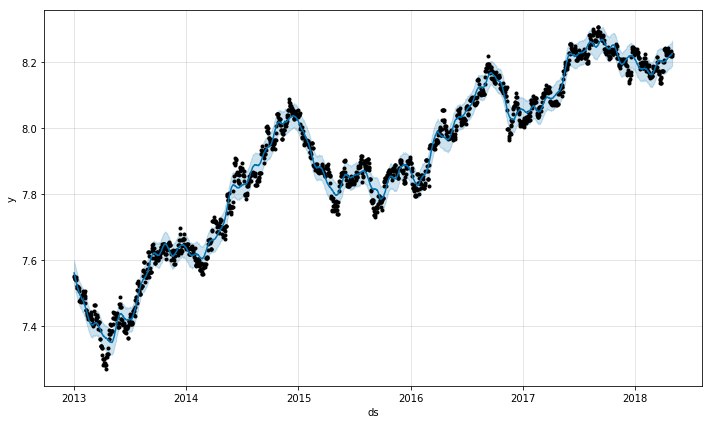

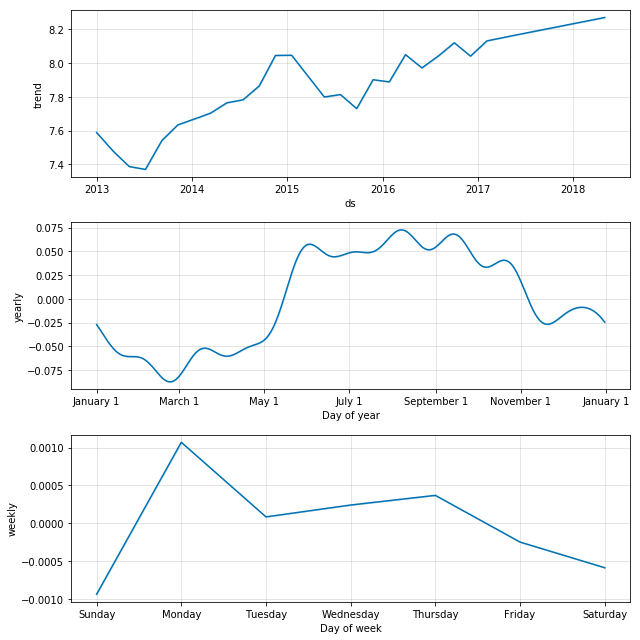

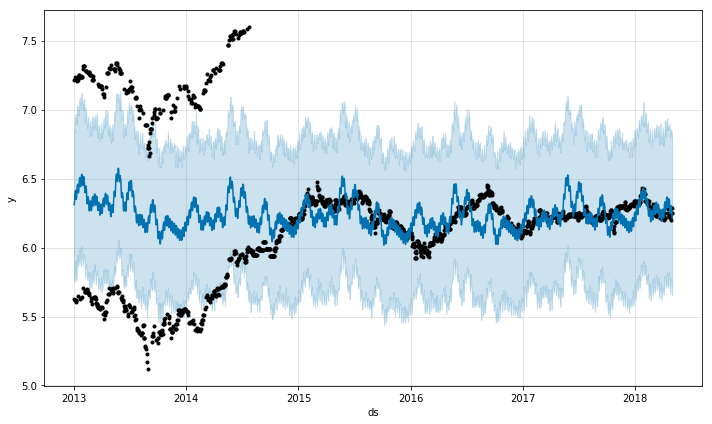

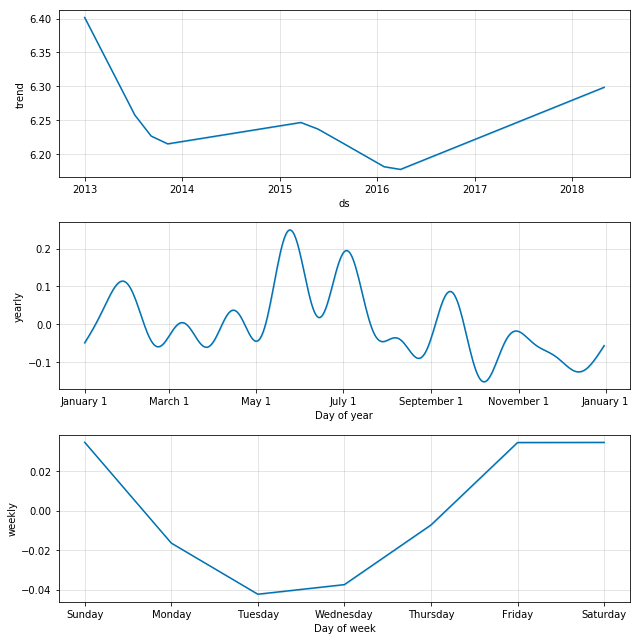

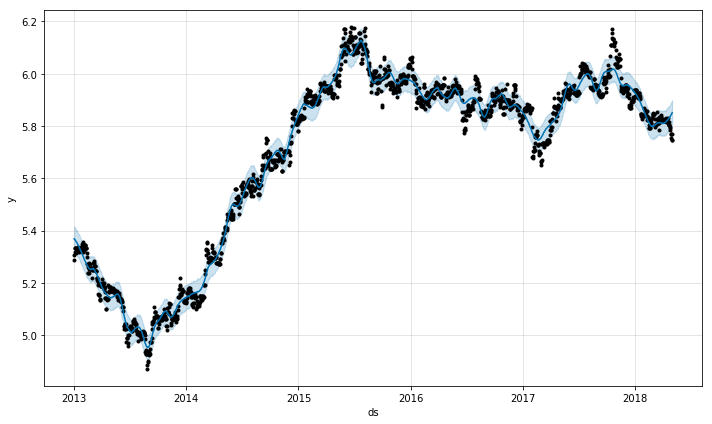

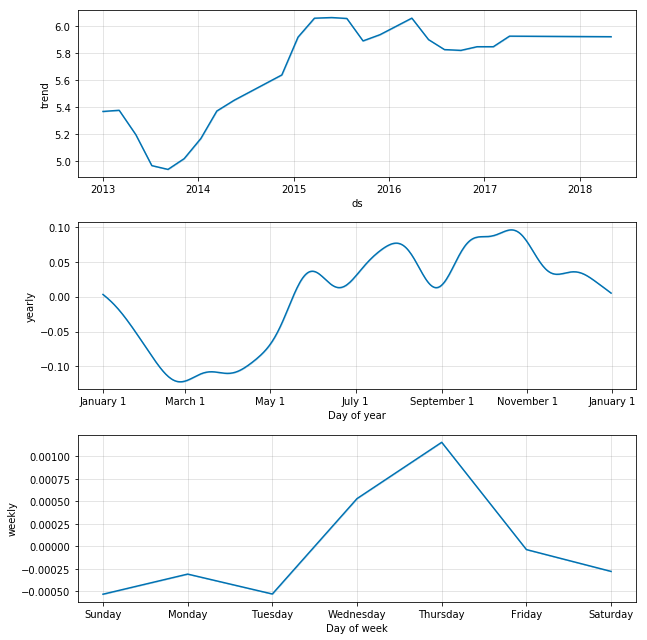

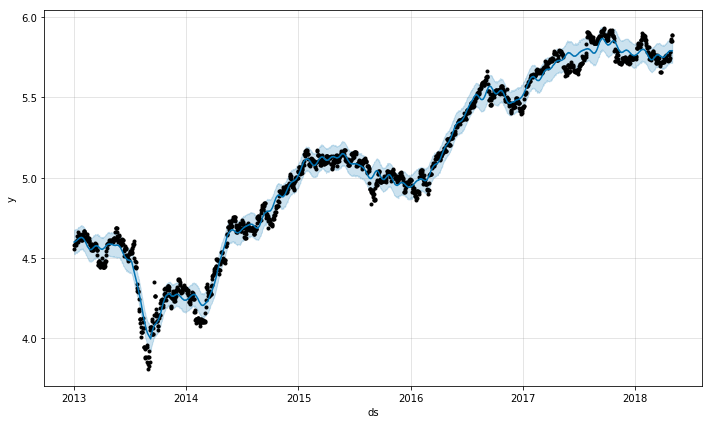

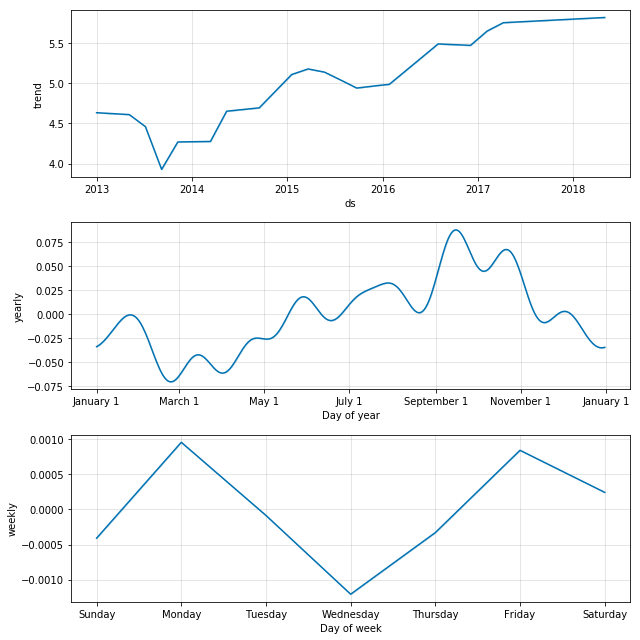

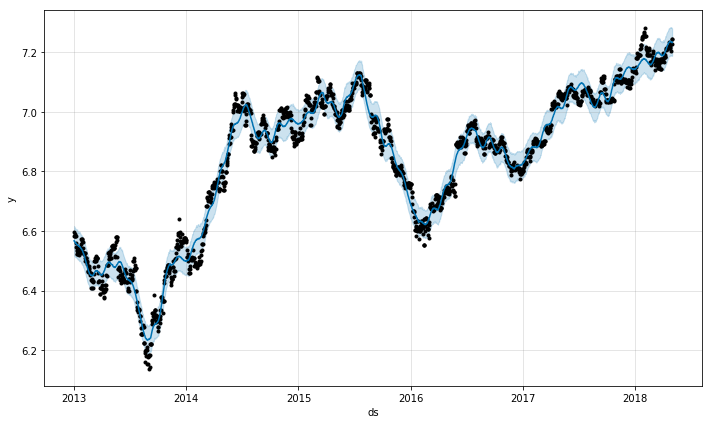

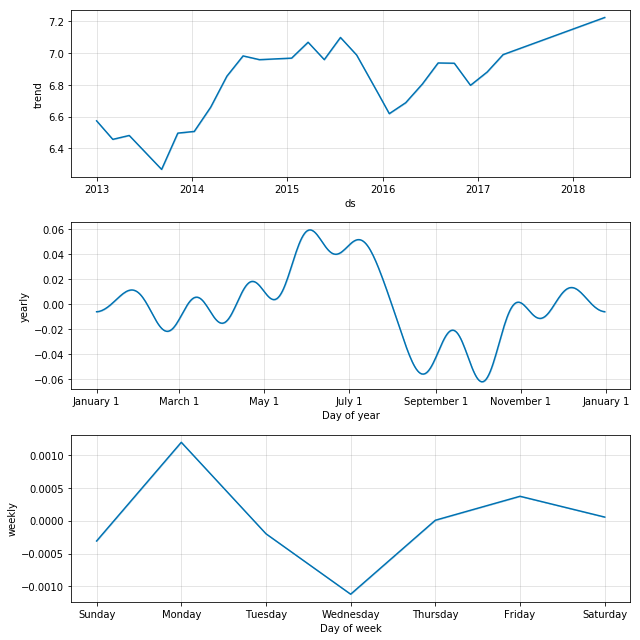

In [86]:
# Creating tuple of stock dataframes
tup_stk_dfs = (stock1_df, stock2_df, stock3_df, stock4_df, stock5_df)

stock1_df, stock2_df, stock3_df, stock4_df, stock5_df = add_vars_to_stock_df(tup_stk_dfs, tickers_for_model)


# EDA, FEATURE SELECTION & MODEL BUILDING FOR STOCK-1

In [87]:
stock1_df.head()

open         high          low        close    adj close  \
date                                                                          
2013-01-01  1905.349976  1911.849976  1884.900024  1897.349976  1648.823853   
2013-01-02  1930.000000  1939.250000  1900.000000  1905.349976  1655.775635   
2013-01-03  1917.099976  1921.900024  1881.000000  1887.949951  1640.655029   
2013-01-04  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   
2013-01-05  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   

              volume     vwap          nse          spy            dj  \
date                                                                    
2013-01-01  104950.0  1899.51  5993.250000  1462.420044  13412.549805   
2013-01-02  353260.0  1912.53  5993.250000  1462.420044  13412.549805   
2013-01-03  334607.0  1900.00  6009.500000  1459.369995  13391.360352   
2013-01-04  163808.0  1882.78  6016.149902  1466.469971  13435.209961   
2013-01-05  163808.0  1882.78  6016.149902  1466.469971  13435.209961   

              ...          kdjk     kdjd_9       kdjd     kdjj_9       kdjj  \
date          ...                                                             
2013-01-01    ...     48.732188  49.577396  49.577396  47.041773  47.041773   
2013-01-02    ...     45.030267  48.061686  48.061686  38.967427  38.967427   
2013-01-03    ...     33.997260  43.373544  43.373544  15.244691  15.244691   
2013-01-04    ...     31.269308  39.338799  39.338799  15.130326  15.130326   
2013-01-05    ...     29.450673  36.042757  36.042757  16.266506  16.266506   

            close_12_ema  close_26_ema      macd     macds     macdh  
date                                                                  
2013-01-01   1897.349976   1897.349976  0.000000  0.000000  0.000000  
2013-01-02   1901.683309   1901.503822  0.179487  0.099715  0.159544  
2013-01-03   1896.323176   1896.634048 -0.310871 -0.068558 -0.484627  
2013-01-04   1893.680076   1894.206354 -0.526277 -0.223612 -0.605331  
2013-01-05   1892.123222   1892.755468 -0.632246 -0.345172 -0.574150  

[5 rows x 54 columns]

In [88]:
stock1_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ds', 'ts_close_pr', 'day_of_week',
       'le_day_of_week', 'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'close_12_ema',
       'close_26_ema', 'macd', 'macds', 'macdh'],
      dtype='object')

### EDA for Stock-1

In [89]:
stock1_df.head()

open         high          low        close    adj close  \
date                                                                          
2013-01-01  1905.349976  1911.849976  1884.900024  1897.349976  1648.823853   
2013-01-02  1930.000000  1939.250000  1900.000000  1905.349976  1655.775635   
2013-01-03  1917.099976  1921.900024  1881.000000  1887.949951  1640.655029   
2013-01-04  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   
2013-01-05  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   

              volume     vwap          nse          spy            dj  \
date                                                                    
2013-01-01  104950.0  1899.51  5993.250000  1462.420044  13412.549805   
2013-01-02  353260.0  1912.53  5993.250000  1462.420044  13412.549805   
2013-01-03  334607.0  1900.00  6009.500000  1459.369995  13391.360352   
2013-01-04  163808.0  1882.78  6016.149902  1466.469971  13435.209961   
2013-01-05  163808.0  1882.78  6016.149902  1466.469971  13435.209961   

              ...          kdjk     kdjd_9       kdjd     kdjj_9       kdjj  \
date          ...                                                             
2013-01-01    ...     48.732188  49.577396  49.577396  47.041773  47.041773   
2013-01-02    ...     45.030267  48.061686  48.061686  38.967427  38.967427   
2013-01-03    ...     33.997260  43.373544  43.373544  15.244691  15.244691   
2013-01-04    ...     31.269308  39.338799  39.338799  15.130326  15.130326   
2013-01-05    ...     29.450673  36.042757  36.042757  16.266506  16.266506   

            close_12_ema  close_26_ema      macd     macds     macdh  
date                                                                  
2013-01-01   1897.349976   1897.349976  0.000000  0.000000  0.000000  
2013-01-02   1901.683309   1901.503822  0.179487  0.099715  0.159544  
2013-01-03   1896.323176   1896.634048 -0.310871 -0.068558 -0.484627  
2013-01-04   1893.680076   1894.206354 -0.526277 -0.223612 -0.605331  
2013-01-05   1892.123222   1892.755468 -0.632246 -0.345172 -0.574150  

[5 rows x 54 columns]

In [90]:
stock1_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ds', 'ts_close_pr', 'day_of_week',
       'le_day_of_week', 'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'close_12_ema',
       'close_26_ema', 'macd', 'macds', 'macdh'],
      dtype='object')

In [91]:
#stock1_df.drop(['ds', 'day_of_week', 'close_-1_s', 'rsv_9', 'kdjk_9', 'kdjd_9', 'kdjj_9', 'close_12_ema', 'close_26_ema'], axis=1, inplace=True)

In [92]:
temp_stock1 = stock1_df[['open', 'high', 'low', 'close', 'adj close', 'volume',
                         'vwap', 'nse', 'spy', 'dj', 'nasdaq', 'pcod', 'hld',
                         'rsi', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'scul',
                         'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b',
                         'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a',
                         'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
                         'beta', 'ts_close_pr','le_day_of_week', 'tr', 'atr', 'wr_10', 'kdjk',
                         'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].copy(deep=True)
temp_stock1.head()

open         high          low        close    adj close  \
date                                                                          
2013-01-01  1905.349976  1911.849976  1884.900024  1897.349976  1648.823853   
2013-01-02  1930.000000  1939.250000  1900.000000  1905.349976  1655.775635   
2013-01-03  1917.099976  1921.900024  1881.000000  1887.949951  1640.655029   
2013-01-04  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   
2013-01-05  1884.000000  1895.000000  1870.099976  1887.949951  1640.655029   

              volume     vwap          nse          spy            dj  \
date                                                                    
2013-01-01  104950.0  1899.51  5993.250000  1462.420044  13412.549805   
2013-01-02  353260.0  1912.53  5993.250000  1462.420044  13412.549805   
2013-01-03  334607.0  1900.00  6009.500000  1459.369995  13391.360352   
2013-01-04  163808.0  1882.78  6016.149902  1466.469971  13435.209961   
2013-01-05  163808.0  1882.78  6016.149902  1466.469971  13435.209961   

              ...     le_day_of_week         tr        atr      wr_10  \
date          ...                                                       
2013-01-01    ...                  5        NaN        NaN  53.803435   
2013-01-02    ...                  6  41.900024  41.900024  62.373577   
2013-01-03    ...                  4  40.900024  41.381505  88.068754   
2013-01-04    ...                  0  24.900024  35.475892  74.186596   
2013-01-05    ...                  2  24.900024  32.531176  74.186596   

                 kdjk       kdjd       kdjj      macd     macds     macdh  
date                                                                       
2013-01-01  48.732188  49.577396  47.041773  0.000000  0.000000  0.000000  
2013-01-02  45.030267  48.061686  38.967427  0.179487  0.099715  0.159544  
2013-01-03  33.997260  43.373544  15.244691 -0.310871 -0.068558 -0.484627  
2013-01-04  31.269308  39.338799  15.130326 -0.526277 -0.223612 -0.605331  
2013-01-05  29.450673  36.042757  16.266506 -0.632246 -0.345172 -0.574150  

[5 rows x 45 columns]

In [93]:
# Summary statistics of numeric data

temp_stock1.describe().T

count           mean            std           min  \
open                 1947.0    2772.821312     662.595119   1438.599976   
high                 1947.0    2803.606235     664.687711   1459.150024   
low                  1947.0    2740.112667     657.253396   1435.000000   
close                1947.0    2770.676733     659.953801   1438.599976   
adj close            1947.0    2612.983607     713.691153   1250.163574   
volume               1947.0  426444.603493  617017.544986      0.000000   
vwap                 1947.0    2771.824386     660.870557   1445.450000   
nse                  1947.0    8015.488393    1427.223729   5285.000000   
spy                  1947.0    2077.732862     313.845981   1457.150024   
dj                   1947.0   18249.708574    2877.885910  13328.849609   
nasdaq               1947.0    4964.293540    1067.398377   3091.810059   
pcod                 1946.0       3.084478      28.342599   -175.399902   
hld                  1947.0      63.493568      32.434739      0.000000   
rsi                  1928.0      51.610726      16.576310      8.442040   
bbul                 1928.0    2886.154434     671.957446   1528.081000   
bbll                 1928.0    2654.581840     640.326168   1394.251000   
stma                 1928.0    2770.368138     653.689329   1479.862500   
ltma                 1828.0    2776.059932     620.655238   1618.514578   
ema                  1929.0    2769.978352     652.699405   1497.593447   
scul                 1947.0       0.065229       0.246992      0.000000   
scll                 1947.0       0.043657       0.204383      0.000000   
stma_cut_ltma_b      1947.0       0.004622       0.067849      0.000000   
stma_cut_ltma_a      1947.0       0.004109       0.063985      0.000000   
close_pr_cut_stma_b  1947.0       0.055984       0.229949      0.000000   
close_pr_cut_stma_a  1947.0       0.055984       0.229949      0.000000   
close_pr_cut_ltma_b  1947.0       0.016949       0.129114      0.000000   
close_pr_cut_ltma_a  1947.0       0.016436       0.127176      0.000000   
dr_stock             1946.0       0.000497       0.012474     -0.054079   
dr_nse               1946.0       0.000328       0.007468     -0.059151   
dr_spy               1946.0       0.000326       0.006489     -0.040979   
dr_dj                1946.0       0.000323       0.006397     -0.046049   
dr_nasdaq            1946.0       0.000450       0.007581     -0.041152   
price_movmnt         1946.0       0.661357       0.473370      0.000000   
beta                 1947.0      -0.159507      84.380514  -2760.890000   
ts_close_pr          1947.0    2769.392469     654.550988   1557.629607   
le_day_of_week       1947.0       3.001027       2.000514      0.000000   
tr                   1946.0      64.797161      33.414098      0.000000   
atr                  1946.0      64.593959      15.208065     29.274207   
wr_10                1947.0      49.972572      29.513927      1.141987   
kdjk                 1947.0      49.853078      23.187749      4.713644   
kdjd                 1947.0      49.854189      20.258544     10.402095   
kdjj                 1947.0      49.850857      36.072798    -16.722178   
macd                 1947.0       6.665424      34.595548   -130.363846   
macds                1947.0       6.616034      32.003501   -112.559342   
macdh                1947.0       0.098779      23.473026    -78.287269   

                               25%            50%            75%           max  
open                   2260.000000    2707.000000    3294.899902  4.084000e+03  
high                   2269.449951    2738.000000    3329.000000  4.091950e+03  
low                    2224.000000    2675.199951    3265.000000  3.995000e+03  
close                  2250.899902    2709.399902    3288.449951  4.048950e+03  
adj close              2015.824341    2539.313965    3152.569702  3.987023e+03  
volume               230295.000000  326874.000000  463637.500000  1.166595e+07  
vwap

In [94]:
temp_stock1.isnull().sum()

open                     0
high                     0
low                      0
close                    0
adj close                0
volume                   0
vwap                     0
nse                      0
spy                      0
dj                       0
nasdaq                   0
pcod                     1
hld                      0
rsi                     19
bbul                    19
bbll                    19
stma                    19
ltma                   119
ema                     18
scul                     0
scll                     0
stma_cut_ltma_b          0
stma_cut_ltma_a          0
close_pr_cut_stma_b      0
close_pr_cut_stma_a      0
close_pr_cut_ltma_b      0
close_pr_cut_ltma_a      0
dr_stock                 1
dr_nse                   1
dr_spy                   1
dr_dj                    1
dr_nasdaq                1
price_movmnt             1
beta                     0
ts_close_pr              0
le_day_of_week           0
tr                       1
a

In [95]:
temp_stock1['ltma'].head(130)

date
2013-01-01            NaN
2013-01-02            NaN
2013-01-03            NaN
2013-01-04            NaN
2013-01-05            NaN
2013-01-06            NaN
2013-01-07            NaN
2013-01-08            NaN
2013-01-09            NaN
2013-01-10            NaN
2013-01-11            NaN
2013-01-12            NaN
2013-01-13            NaN
2013-01-14            NaN
2013-01-15            NaN
2013-01-16            NaN
2013-01-17            NaN
2013-01-18            NaN
2013-01-19            NaN
2013-01-20            NaN
2013-01-21            NaN
2013-01-22            NaN
2013-01-23            NaN
2013-01-24            NaN
2013-01-25            NaN
2013-01-26            NaN
2013-01-27            NaN
2013-01-28            NaN
2013-01-29            NaN
2013-01-30            NaN
                 ...     
2013-04-11            NaN
2013-04-12            NaN
2013-04-13            NaN
2013-04-14            NaN
2013-04-15            NaN
2013-04-16            NaN
2013-04-17            NaN
2013-04

In [96]:
# Removing first 120 rows of the dataframe to drop NaNs in the first 120 rows containing 'ltma'=NaN

temp_stock1 = temp_stock1.iloc[120:]

In [97]:
temp_stock1['ltma'].head()

date
2013-05-01    1675.155409
2013-05-02    1672.726242
2013-05-03    1670.421659
2013-05-04    1668.117077
2013-05-05    1665.812494
Name: ltma, dtype: float64

In [98]:
temp_stock1.isnull().sum()

open                   0
high                   0
low                    0
close                  0
adj close              0
volume                 0
vwap                   0
nse                    0
spy                    0
dj                     0
nasdaq                 0
pcod                   0
hld                    0
rsi                    0
bbul                   0
bbll                   0
stma                   0
ltma                   0
ema                    0
scul                   0
scll                   0
stma_cut_ltma_b        0
stma_cut_ltma_a        0
close_pr_cut_stma_b    0
close_pr_cut_stma_a    0
close_pr_cut_ltma_b    0
close_pr_cut_ltma_a    0
dr_stock               0
dr_nse                 0
dr_spy                 0
dr_dj                  0
dr_nasdaq              0
price_movmnt           0
beta                   0
ts_close_pr            0
le_day_of_week         0
tr                     0
atr                    0
wr_10                  0
kdjk                   0


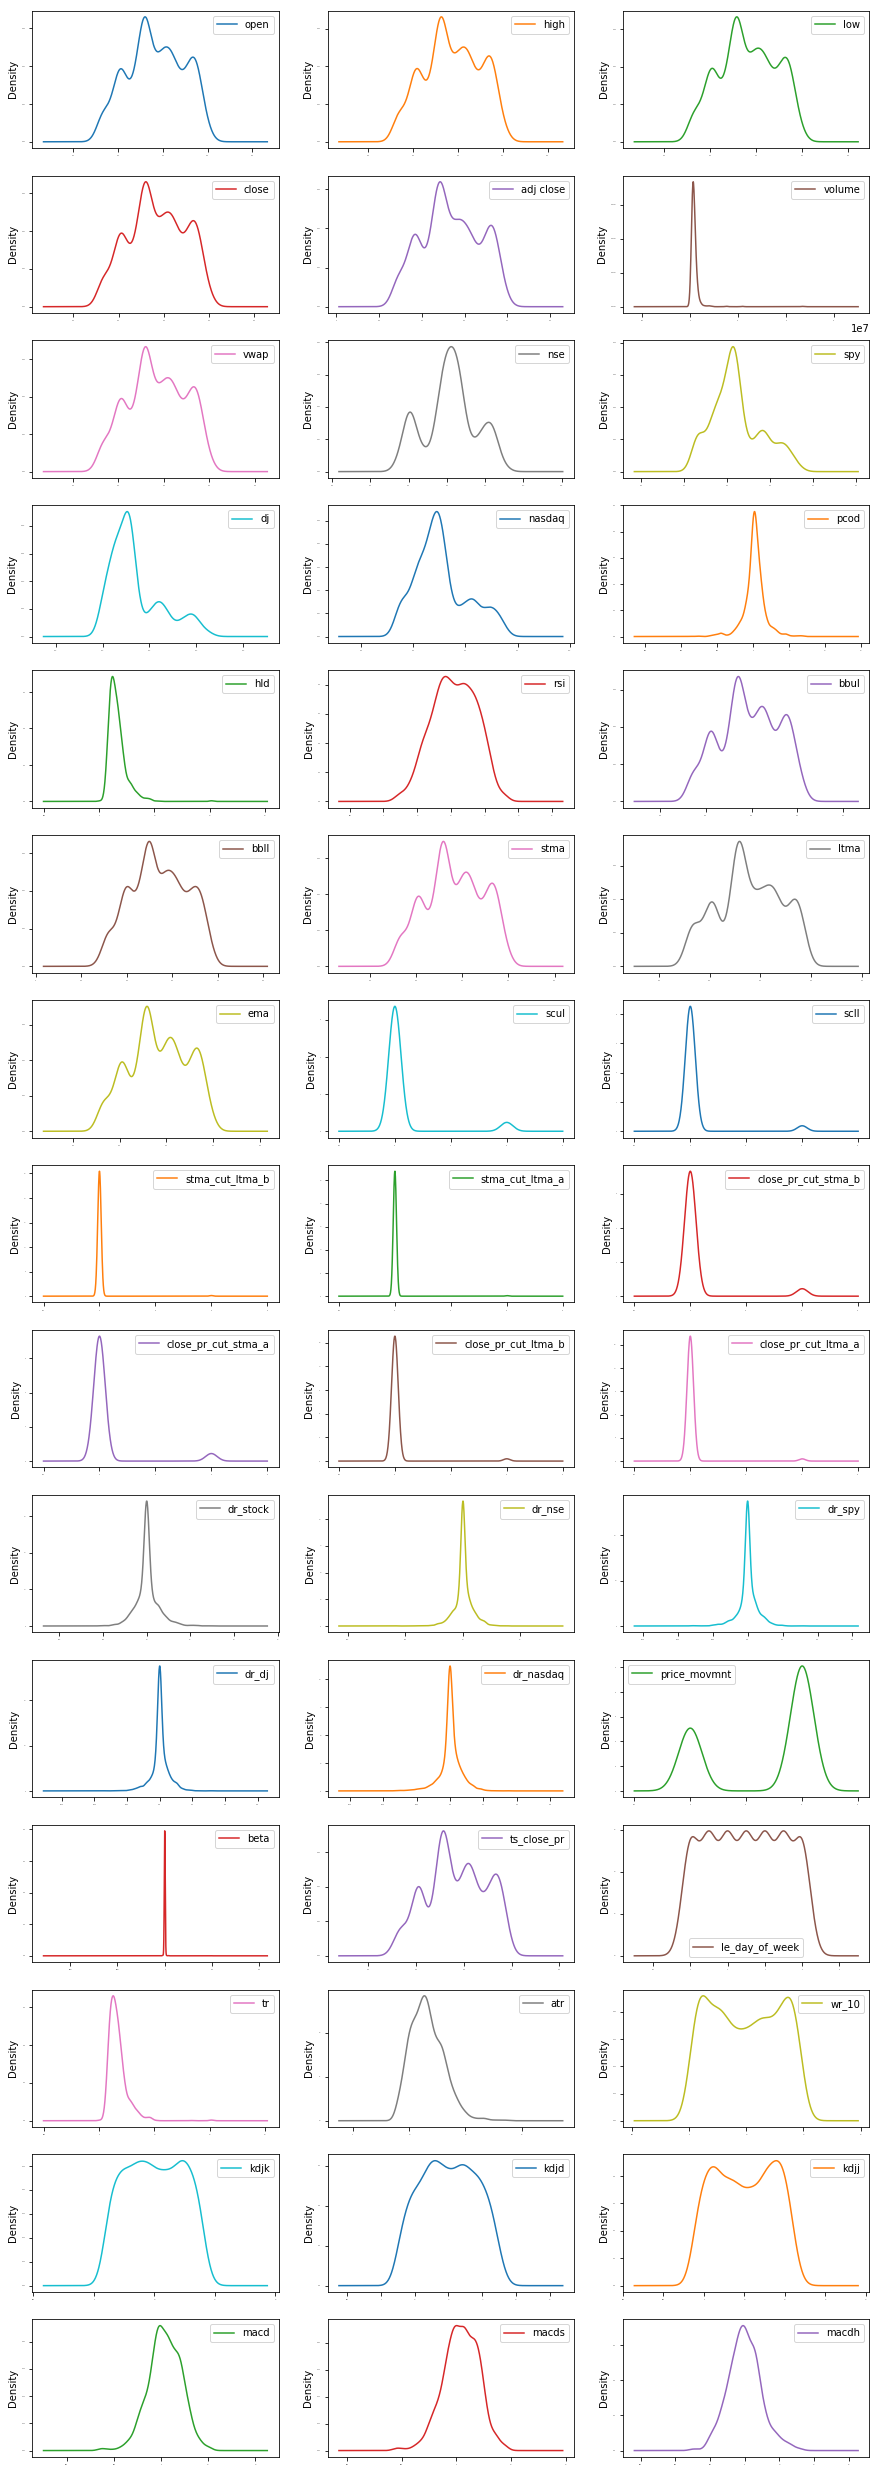

In [99]:
# density plots

temp_stock1.plot(kind='density', subplots=True, layout=(15,3), sharex=False, fontsize=1, figsize=(15,45))
plt.show()


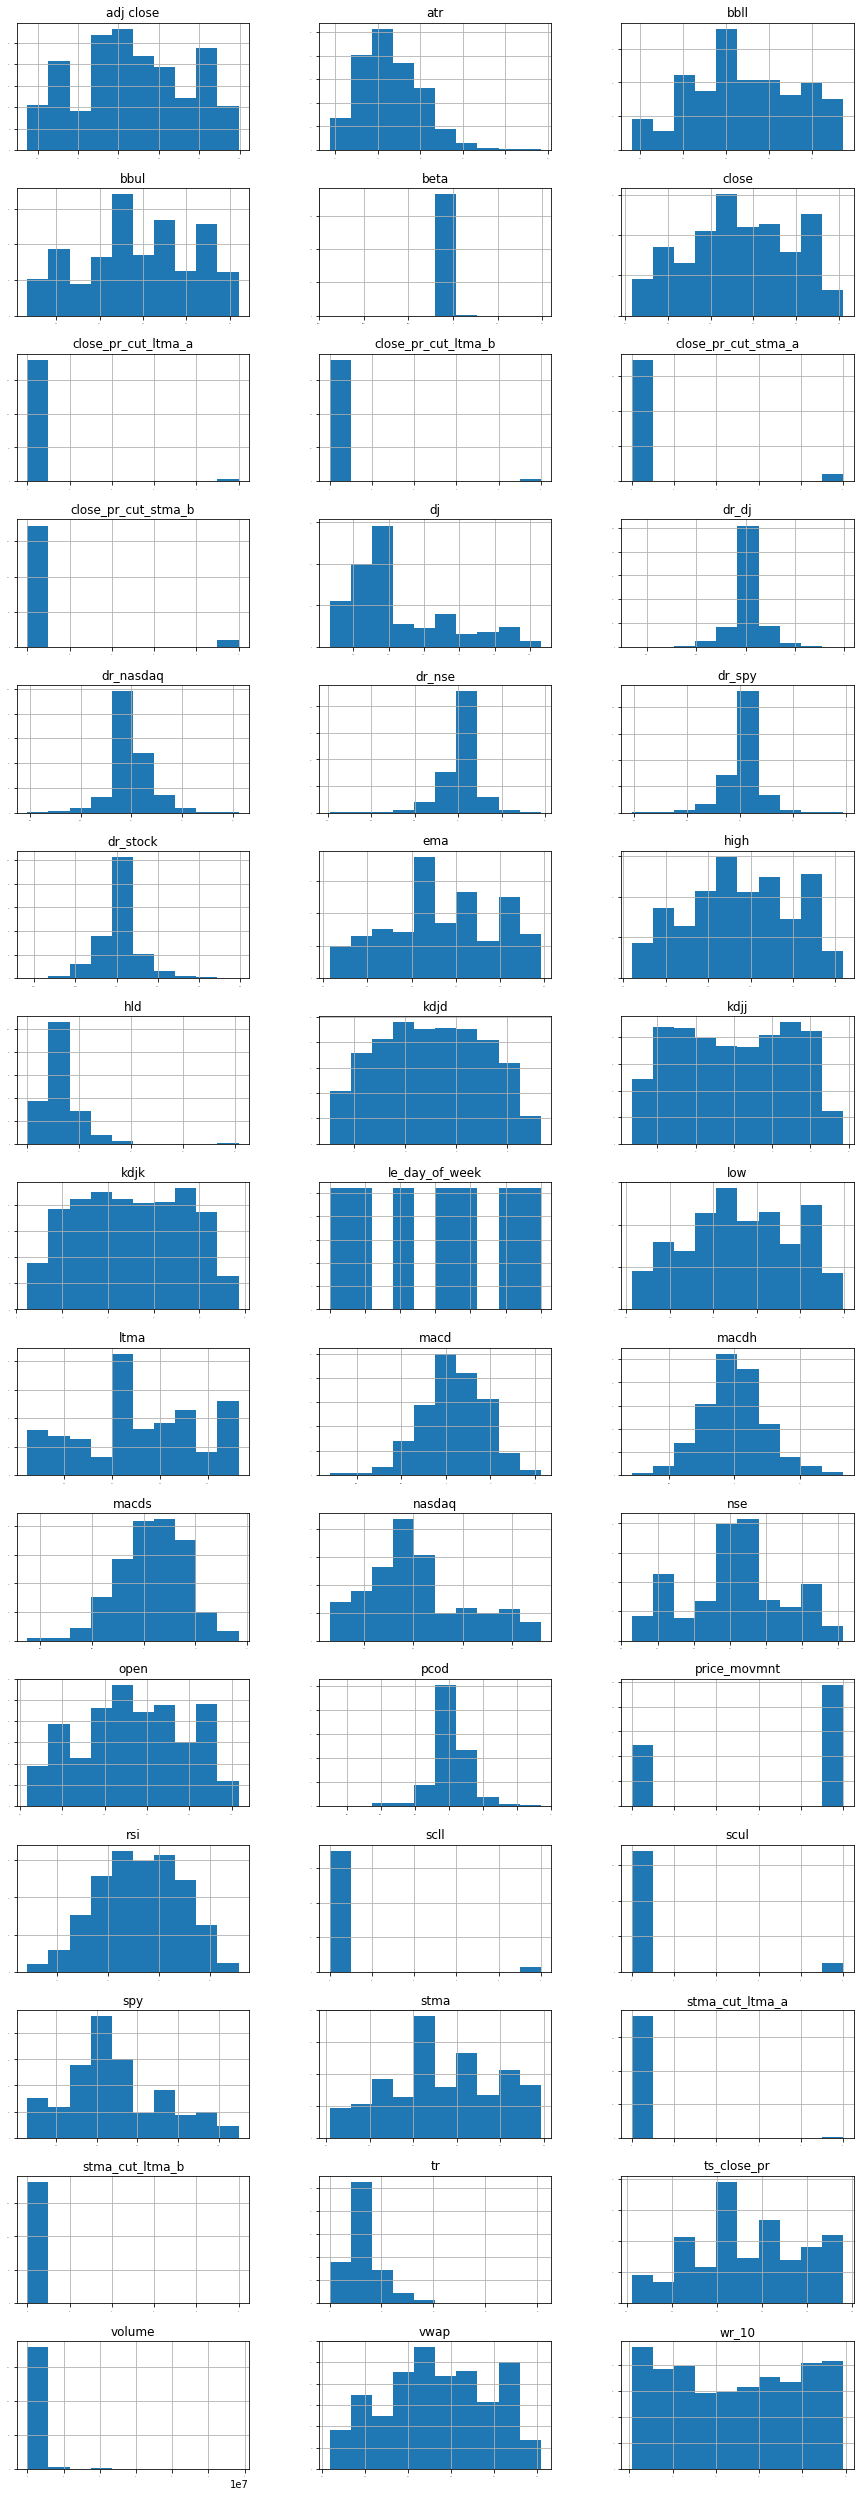

In [100]:
# histograms

temp_stock1.hist(layout=(15,3), sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,45))
plt.show()


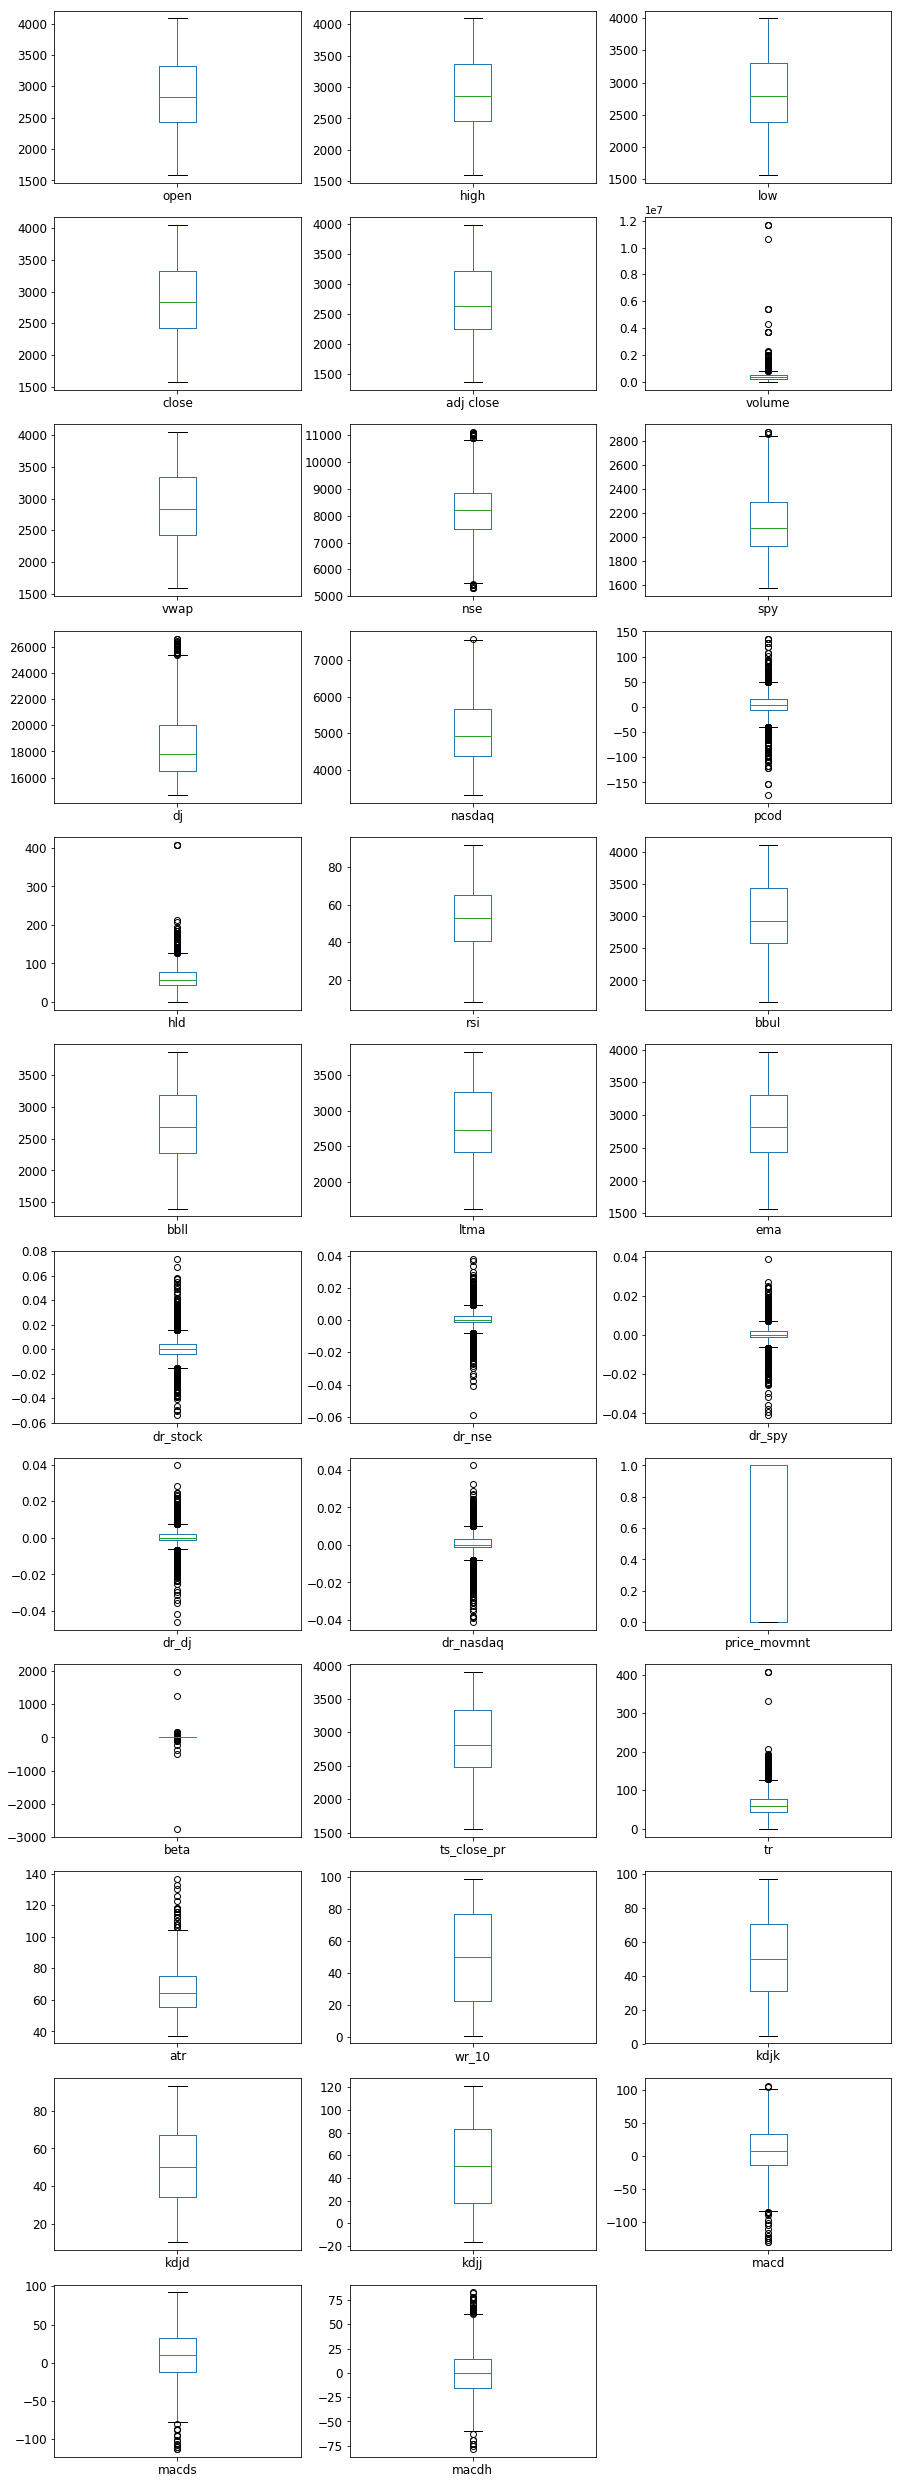

In [101]:
# Box and whisker plots

temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'ltma',
'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
'beta', 'ts_close_pr', 'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd',
'macds', 'macdh']].plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, fontsize=12, figsize=(15,45))
plt.show()


In [102]:
temp_stock1['scul'].value_counts()

0    1706
1     121
Name: scul, dtype: int64

In [103]:
temp_stock1['scll'].value_counts()

0    1750
1      77
Name: scll, dtype: int64

In [104]:
temp_stock1['stma_cut_ltma_b'].value_counts()

0    1818
1       9
Name: stma_cut_ltma_b, dtype: int64

In [105]:
temp_stock1['stma_cut_ltma_a'].value_counts()

0    1819
1       8
Name: stma_cut_ltma_a, dtype: int64

In [106]:
temp_stock1['close_pr_cut_stma_b'].value_counts()

0    1724
1     103
Name: close_pr_cut_stma_b, dtype: int64

In [107]:
temp_stock1['close_pr_cut_stma_a'].value_counts()

0    1723
1     104
Name: close_pr_cut_stma_a, dtype: int64

In [108]:
temp_stock1['close_pr_cut_ltma_b'].value_counts()

0    1794
1      33
Name: close_pr_cut_ltma_b, dtype: int64

In [109]:
temp_stock1['close_pr_cut_ltma_a'].value_counts()

0    1795
1      32
Name: close_pr_cut_ltma_a, dtype: int64

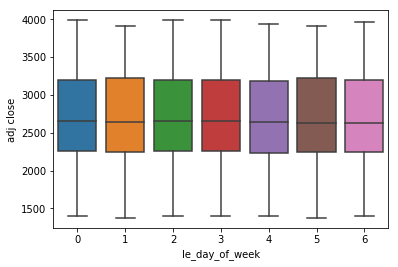

In [110]:
sns.boxplot(x="le_day_of_week", y="adj close", data=temp_stock1)

In [111]:
temp_stock1['price_movmnt'].value_counts()

1.0    1216
0.0     611
Name: price_movmnt, dtype: int64

In [112]:
temp1 = temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'price_movmnt']] 
temp2 = temp_stock1[['volume', 'vwap', 'nse', 'spy', 'dj', 'price_movmnt']] 
temp3 = temp_stock1[['nasdaq', 'pcod', 'hld', 'rsi', 'stma', 'price_movmnt']] 
temp4 = temp_stock1[['ltma', 'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'price_movmnt']]  
temp5 = temp_stock1[['dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week', 'price_movmnt']] 
temp6 = temp_stock1[['tr', 'atr','wr_10', 'kdjk', 'kdjd', 'price_movmnt']]  
temp7 = temp_stock1[['kdjj', 'macd', 'macds', 'macdh', 'price_movmnt']] 

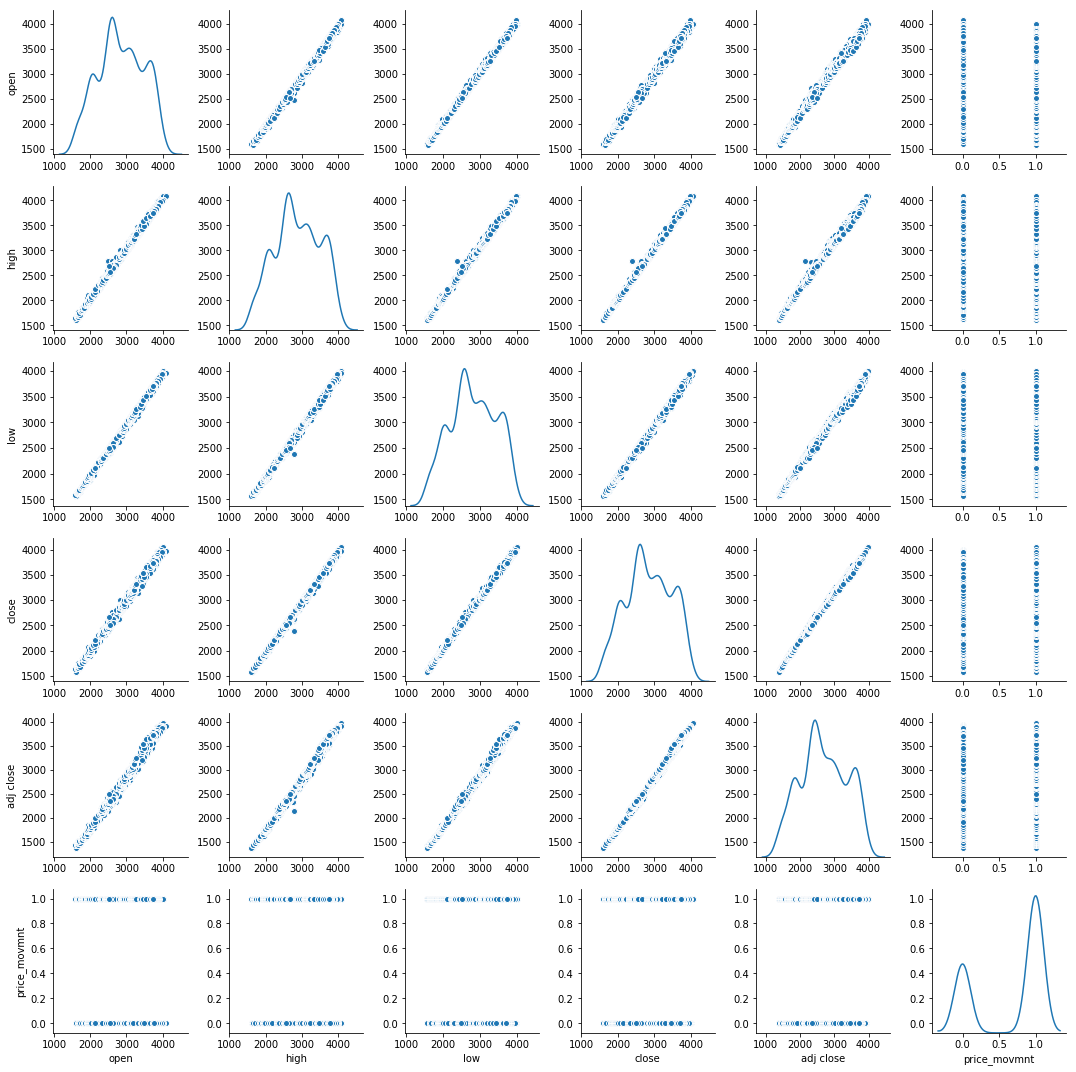

In [113]:
sns.pairplot(temp1, diag_kind='kde')

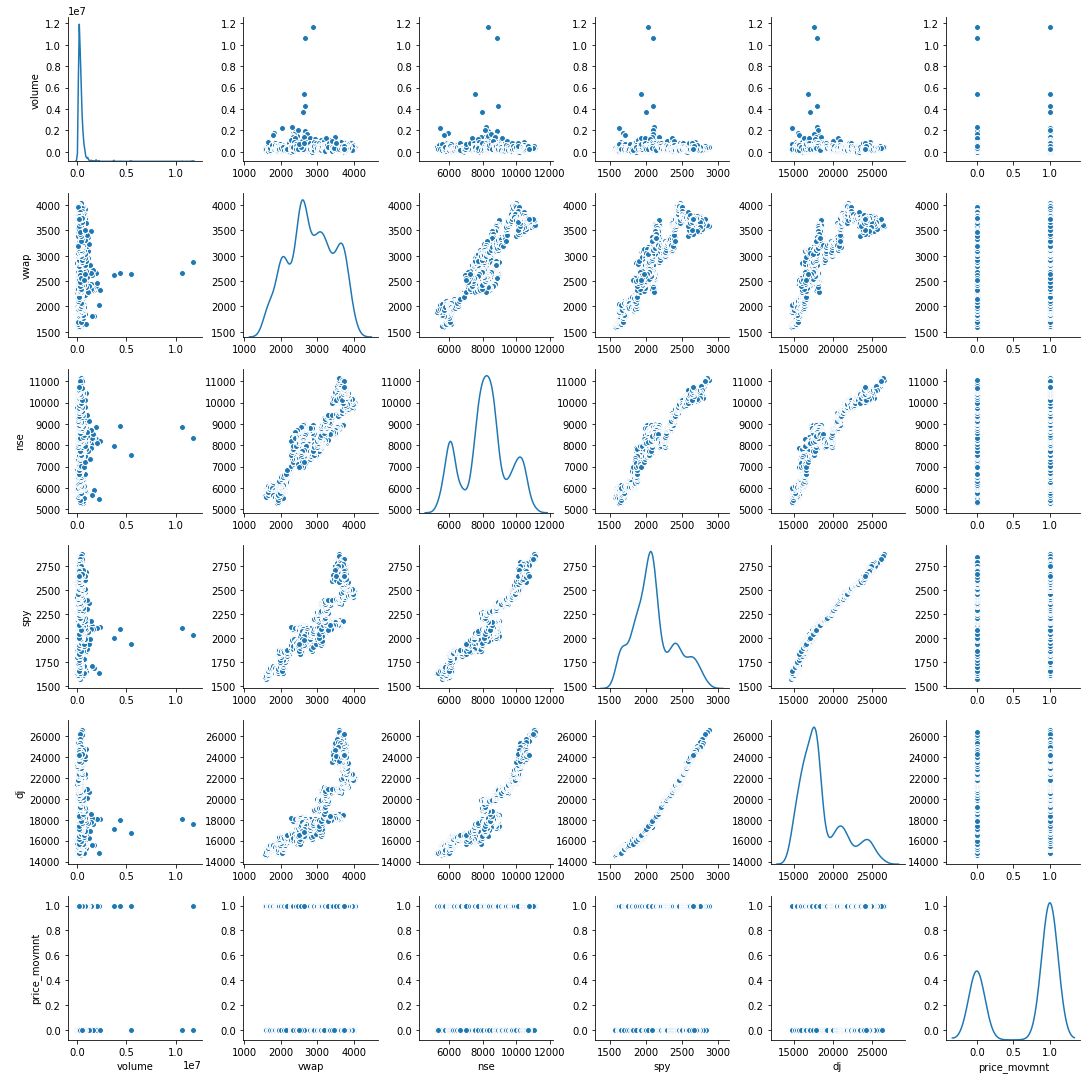

In [114]:
sns.pairplot(temp2, diag_kind='kde')

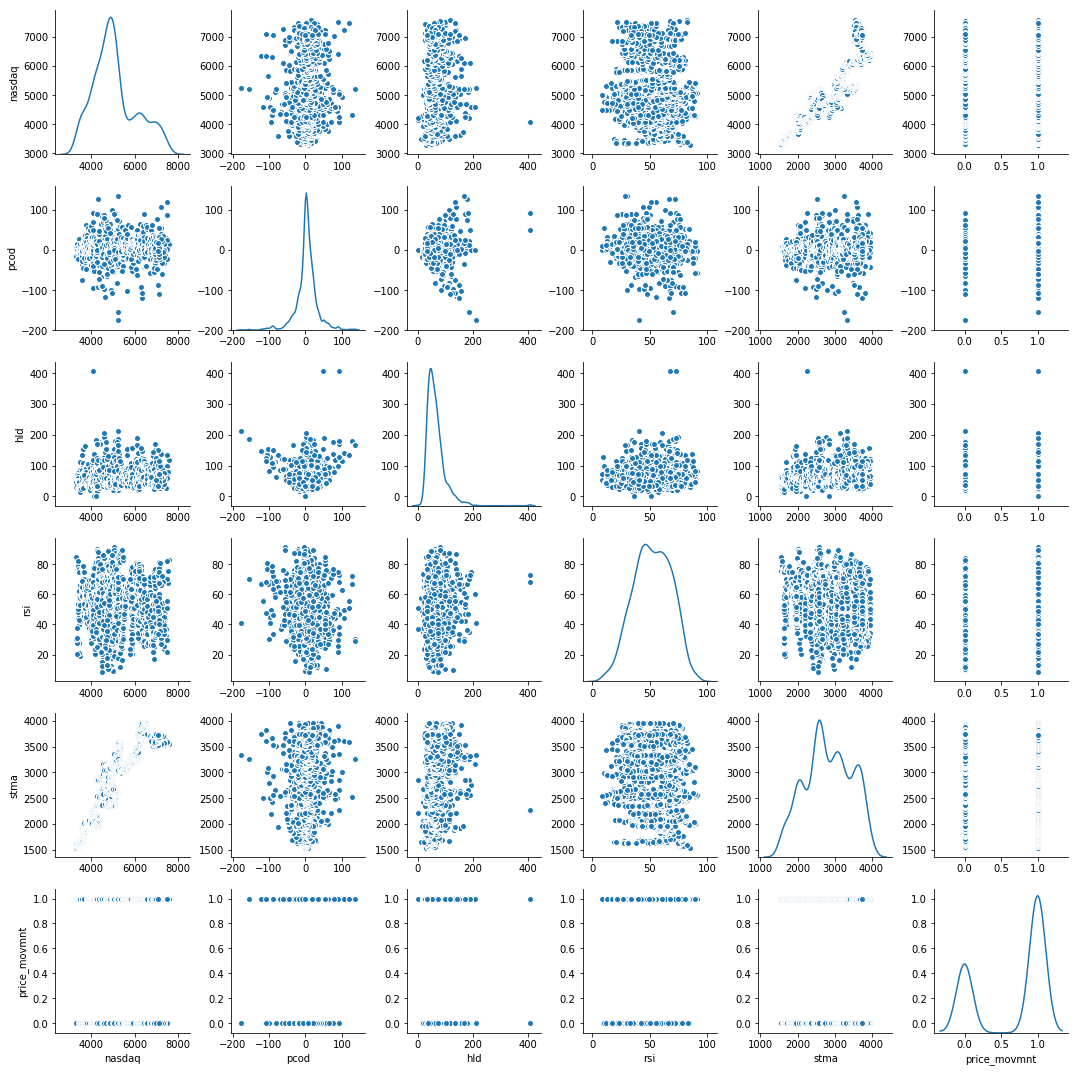

In [115]:
sns.pairplot(temp3, diag_kind='kde')

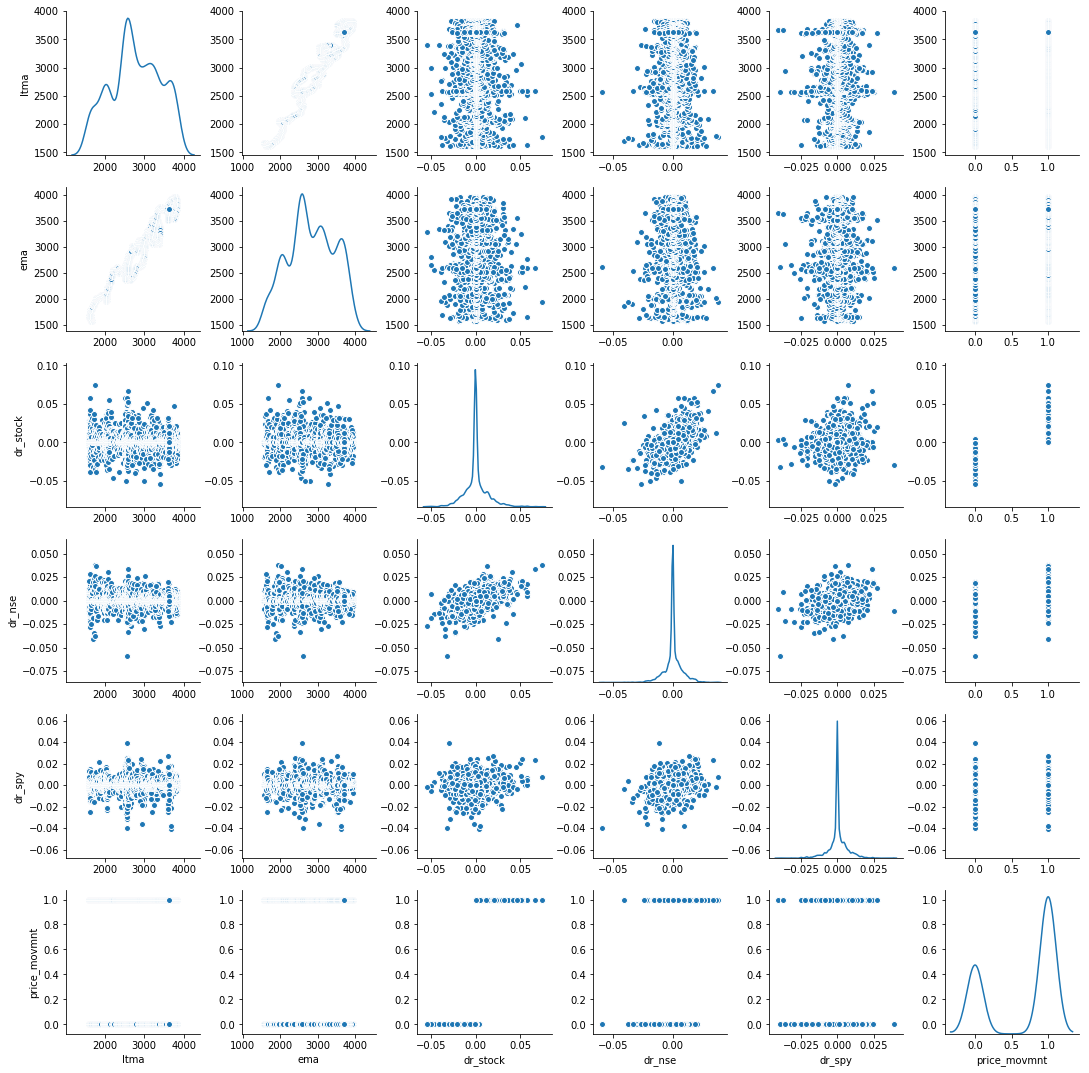

In [116]:
sns.pairplot(temp4, diag_kind='kde')

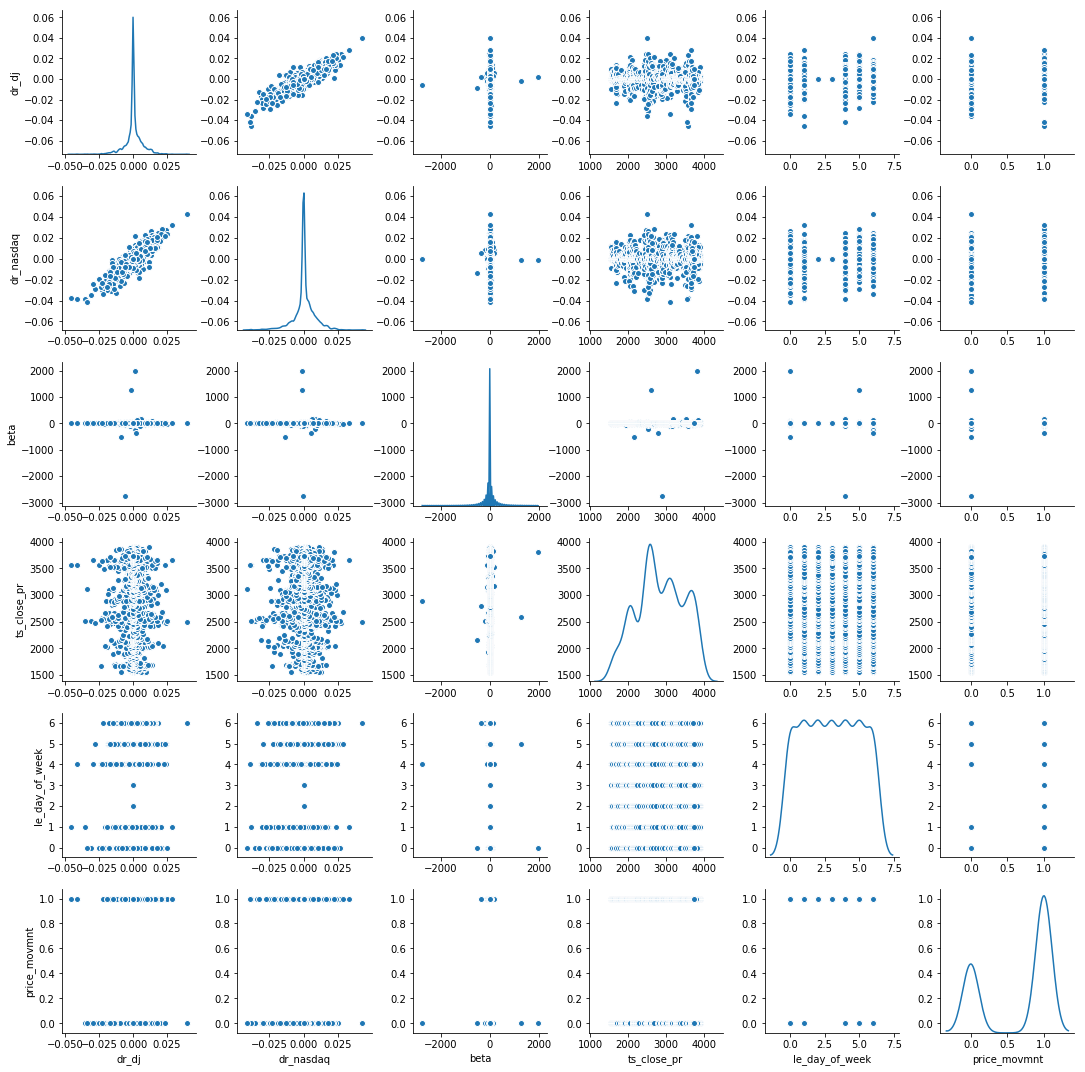

In [117]:
sns.pairplot(temp5, diag_kind='kde')

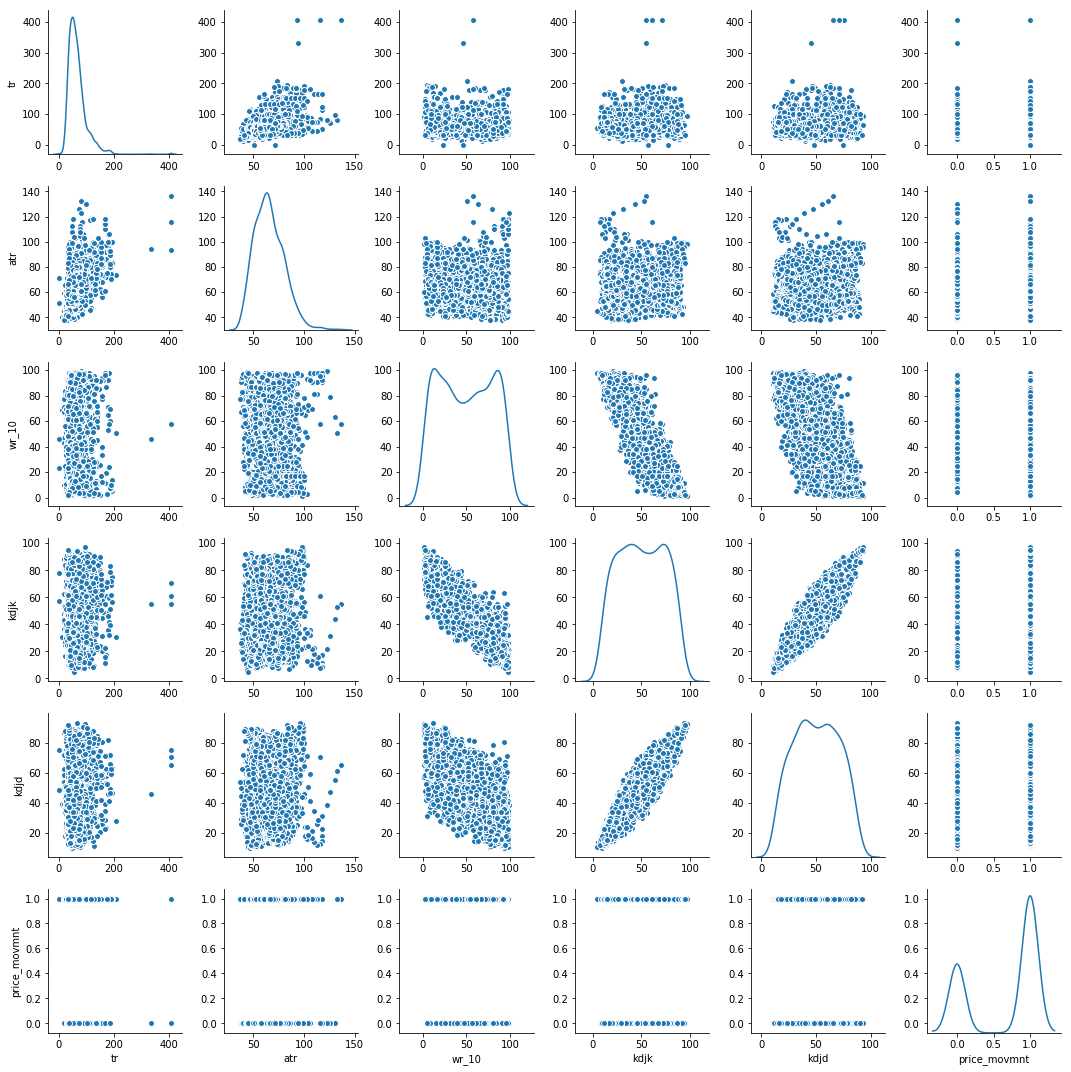

In [118]:
sns.pairplot(temp6, diag_kind='kde')

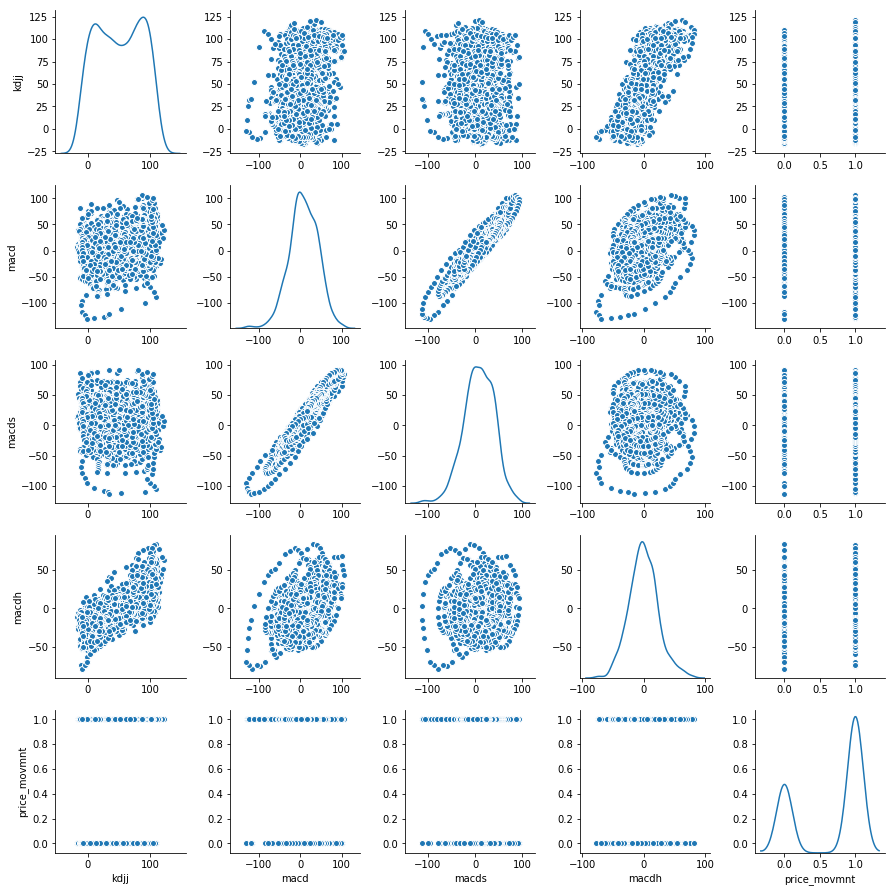

In [119]:
sns.pairplot(temp7, diag_kind='kde')

In [120]:
temp_stock1.head()

open         high          low        close    adj close  \
date                                                                          
2013-05-01  1650.199951  1659.949951  1630.000000  1644.449951  1429.050049   
2013-05-02  1644.949951  1672.000000  1611.000000  1613.849976  1402.458252   
2013-05-03  1613.849976  1624.449951  1587.150024  1611.400024  1400.329102   
2013-05-04  1613.849976  1624.449951  1587.150024  1611.400024  1400.329102   
2013-05-05  1613.849976  1624.449951  1587.150024  1611.400024  1400.329102   

              volume     vwap          nse          spy            dj  \
date                                                                    
2013-05-01  329076.0  1640.51  5930.200195  1582.699951  14700.950195   
2013-05-02  472417.0  1642.40  5999.350098  1597.589966  14831.580078   
2013-05-03  203386.0  1607.18  5944.000000  1614.420044  14973.959961   
2013-05-04  203386.0  1607.18  5944.000000  1614.420044  14973.959961   
2013-05-05  203386.0  1607.18  5944.000000  1614.420044  14973.959961   

              ...      le_day_of_week         tr        atr      wr_10  \
date          ...                                                        
2013-05-01    ...                   6  29.949951  52.778195  21.767970   
2013-05-02    ...                   4  61.000000  53.365542  43.518813   
2013-05-03    ...                   0  37.299927  52.217862  45.041941   
2013-05-04    ...                   2  37.299927  51.152178  58.735279   
2013-05-05    ...                   3  37.299927  50.162631  67.238935   

                 kdjk       kdjd       kdjj       macd      macds      macdh  
date                                                                          
2013-05-01  78.300257  79.653446  75.593879  28.849184  11.888833  33.920702  
2013-05-02  71.027234  76.778042  59.525617  28.371739  15.185414  26.372650  
2013-05-03  61.106396  71.554160  40.210869  27.478921  17.644115  19.669611  
2013-05-04  51.657953  64.922091  25.129676  26.466266  19.408546  14.115441  
2013-05-05  45.358990  58.401057  19.274856  25.371264  20.601089   9.540349  

[5 rows x 45 columns]

In [121]:
temp_stock1.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr', 'le_day_of_week',
       'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'],
      dtype='object')

In [122]:
temp_stock1[['pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'scul', 'scll']].head(50)

pcod         hld        rsi      bbul      bbll         stma  \
date                                                                            
2013-05-01   5.750000   29.949951  84.635051  1681.707  1401.273  1541.489990   
2013-05-02   0.500000   61.000000  76.094814  1687.025  1411.805  1549.414990   
2013-05-03   0.000000   37.299927  75.485869  1689.982  1424.453  1557.217493   
2013-05-04   2.449952   37.299927  75.485869  1690.732  1439.308  1565.019995   
2013-05-05   2.449952   37.299927  79.854865  1685.809  1461.511  1573.659998   
2013-05-06   0.599976   49.549927  79.002334  1691.165  1472.260  1581.712500   
2013-05-07   6.599976   58.900024  82.421214  1706.669  1478.261  1592.464996   
2013-05-08   2.650024   43.849976  74.622782  1713.301  1488.764  1601.032495   
2013-05-09  -1.349976   29.650024  74.569204  1717.016  1502.159  1609.587494   
2013-05-10   3.900024   49.099976  76.515041  1723.179  1515.991  1619.584992   
2013-05-11 -24.949951   49.099976  76.515041  1724.876  1534.288  1629.582489   
2013-05-12 -24.949951   49.099976  74.681902  1727.493  1548.937  1638.214984   
2013-05-13   8.750000   43.349976  65.730083  1729.050  1557.905  1643.477484   
2013-05-14   3.150024   31.849976  64.886400  1728.461  1568.584  1648.522485   
2013-05-15  15.500000   31.099976  63.282935  1735.030  1570.625  1652.827484   
2013-05-16  -1.599976   36.650024  65.506225  1737.396  1577.969  1657.682483   
2013-05-17  -0.949951   25.849976  63.567344  1737.192  1586.928  1662.059985   
2013-05-18   8.599976   25.849976  63.567344  1735.531  1597.344  1666.437488   
2013-05-19   8.599976   25.849976  56.575544  1737.232  1599.203  1668.217487   
2013-05-20   4.599976   25.449951  60.091674  1740.691  1601.469  1671.079987   
2013-05-21  -0.049927   30.250000  56.524649  1741.707  1604.388  1673.047491   
2013-05-22   1.299927   43.800048  55.995407  1738.675  1611.070  1674.872491   
2013-05-23  -5.349976   45.050049  56.636444  1734.497  1619.273  1676.884991   
2013-05-24  10.349976   39.949951  53.413150  1730.994  1624.971  1677.982489   
2013-05-25  28.650024   39.949951  53.413150  1726.947  1631.213  1679.079987   
2013-05-26  28.650024   39.949951  47.169801  1728.709  1627.846  1678.277484   
2013-05-27  -3.349976   55.849976  39.499186  1725.372  1625.983  1675.677484   
2013-05-28  14.650024  111.199951  61.755795  1739.153  1619.567  1679.359985   
2013-05-29  11.250000   53.000000  66.007966  1762.168  1607.812  1684.989984   
2013-05-30  -8.099975   48.750000  56.456543  1769.654  1604.976  1687.314984   
2013-05-31  -6.449951   24.700073  54.184440  1773.797  1603.973  1688.884985   
2013-06-01   8.650024   24.700073  54.184440  1777.745  1603.165  1690.454987   
2013-06-02   8.650024   24.700073  58.235466  1782.772  1603.888  1693.329987   
2013-06-03 -15.349976   86.900024  49.512908  1782.767  1603.493  1693.129987   
2013-06-04  27.500000   51.549927  45.640486  1781.500  1601.435  1691.467487   
2013-06-05 -15.599976   30.199951  46.222286  1780.808  1599.282  1690.044989   
2013-06-06  -6.900024   23.599976  45.073151  1780.976  1595.309  1688.142487   
2013-06-07   3.550048   31.449951  45.151279  1780.916  1591.619  1686.267487   
2013-06-08   3.000000   31.449951  45.151279  1780.668  1588.117  1684.392487   
2013-06-09   3.000000   31.449951  42.582577  1778.968  1584.337  1681.652490   
2013-06-10   3.900025   47.550049  44.204020  1778.450  1580.730  1679.589990   
2013-06-11  -2.050049   38.750000  50.398081  1778.425  1581.020  1679.722492   
2013-06-12 -11.400024   75.400024  44.481553  1780.475  1574.840  1677.657489   
2013-06-13 -10.299927   64.699951  47.309139  1781.606  1571.774  1676.689990   
2013-06-14  -2.000000   27.000000  46.254257  1783.302  1567.323  1675.312494   
2013-06-15   6.199951   27.000000  46.254257  1784.842  1563.028  1673.934998   
2013-06-16   6.199951   27.000000  42.999287  1786.278  1556.737  1671.507501   
2013-06-17   4.199951   33.449951  27.481180  17

In [123]:
temp_stock1[['stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].head(50)

stma_cut_ltma_b  stma_cut_ltma_a  close_pr_cut_stma_b  \
date                                                                
2013-05-01                0                0                    0   
2013-05-02                0                0                    0   
2013-05-03                0                0                    0   
2013-05-04                0                0                    0   
2013-05-05                0                0                    0   
2013-05-06                0                0                    0   
2013-05-07                0                0                    0   
2013-05-08                0                0                    0   
2013-05-09                0                0                    0   
2013-05-10                0                0                    0   
2013-05-11                0                0                    0   
2013-05-12                0                0                    0   
2013-05-13                0                0                    0   
2013-05-14                0                0                    0   
2013-05-15                1                0                    0   
2013-05-16                0                0                    0   
2013-05-17                0                0                    0   
2013-05-18                0                0                    0   
2013-05-19                0                0                    0   
2013-05-20                0                0                    0   
2013-05-21                0                0                    0   
2013-05-22                0                0                    0   
2013-05-23                0                0                    0   
2013-05-24                0                0                    0   
2013-05-25                0                0                    0   
2013-05-26                0                0                    0   
2013-05-27                0                0                    0   
2013-05-28                0                0                    1   
2013-05-29                0                0                    0   
2013-05-30                0                0                    0   
2013-05-31                0                0                    0   
2013-06-01                0                0                    0   
2013-06-02                0                0                    0   
2013-06-03                0                0                    0   
2013-06-04                0                0                    0   
2013-06-05                0                0                    0   
2013-06-06                0                0                    0   
2013-06-07                0                0                    0   
2013-06-08                0                0                    0   
2013-06-09                0                0                    0   
2013-06-10                0                0                    0   
2013-06-11                0                0                    0   
2013-06-12                0                0                    0   
2013-06-13                0                0                    0   
2013-06-14                0                0                    0   
2013-06-15                0                0                    0   
2013-06-16                0                0                    0   
2013-06-17                0                0                    0   
2013-06-18                0                0                    0   
2013-06-19                0                0                    0   

            close_pr_cut_stma_a  close_pr_cut_ltma_b  close_pr_cut_ltma_a  
date                                                                       
2013-05-01                    0                    0                    0  
2013-05-02                    0                    0                    0  
2013-05-03                    0                    0                    0  
2013-05-04                    0            

In [124]:
temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr']].head(50)

dr_stock    dr_nse    dr_spy     dr_dj  dr_nasdaq  price_movmnt  \
date                                                                          
2013-05-01  0.000000  0.000000 -0.009308 -0.009357  -0.008910           1.0   
2013-05-02 -0.018608  0.011661  0.009408  0.008886   0.012576           0.0   
2013-05-03 -0.001518 -0.009226  0.010535  0.009600   0.011378           0.0   
2013-05-04  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-05-05  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-05-06  0.023582  0.004551  0.001908 -0.000339   0.004244           1.0   
2013-05-07  0.034528  0.012142  0.005230  0.005833   0.001079           1.0   
2013-05-08 -0.017581  0.004261  0.004139  0.003249   0.004899           0.0   
2013-05-09 -0.000149 -0.003155 -0.003687 -0.001490  -0.001201           0.0   
2013-05-10  0.017213  0.007372  0.004322  0.002378   0.008040           1.0   
2013-05-11  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-05-12  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-05-13 -0.015308 -0.018754  0.000043 -0.001773   0.000643           0.0   
2013-05-14 -0.002591  0.002500  0.010142  0.008188   0.006927           0.0   
2013-05-15  0.017527  0.025244  0.005114  0.003972   0.002602           1.0   
2013-05-16 -0.005810  0.003766 -0.005010 -0.002780  -0.001838           0.0   
2013-05-17 -0.005638  0.002820  0.010300  0.007955   0.009734           0.0   
2013-05-18  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-05-19  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-05-20  0.010271 -0.004913 -0.000708 -0.001245  -0.000726           1.0   
2013-05-21 -0.010519 -0.006952  0.001722  0.003410   0.001627           0.0   
2013-05-22 -0.019866 -0.003206 -0.008274 -0.005226  -0.011085           0.0   
2013-05-23  0.000788 -0.020912 -0.002924 -0.000828  -0.001120           1.0   
2013-05-24 -0.011080  0.002765 -0.000551  0.000562  -0.000081           0.0   
2013-05-25  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-05-26  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-05-27  0.012857  0.016646  0.000000  0.000000   0.000000           1.0   
2013-05-28  0.057817  0.004619  0.006341  0.006946   0.008600           1.0   
2013-05-29  0.022114 -0.001137 -0.007048 -0.006917  -0.006125           1.0   
2013-05-30 -0.020825  0.003235  0.003670  0.001420   0.006858           0.0   
2013-05-31 -0.008621 -0.022550 -0.014307 -0.013636  -0.010137           0.0   
2013-06-01  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-06-02  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-06-03 -0.037924 -0.007793  0.005936  0.009160   0.002737           0.0   
2013-06-04  0.000060 -0.003342 -0.005511 -0.005014  -0.005803           1.0   
2013-06-05 -0.003053  0.000743 -0.013780 -0.014294  -0.012707           0.0   
2013-06-06 -0.011498 -0.000414  0.008490  0.005349   0.006635           0.0   
2013-06-07  0.000334 -0.006823  0.012832  0.013796   0.013192           1.0   
2013-06-08  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-06-09  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-06-10 -0.002641 -0.000510 -0.000347 -0.000625   0.001312           0.0   
2013-06-11  0.006362 -0.015175 -0.010153 -0.007650  -0.010599           1.0   
2013-06-12 -0.025802 -0.004941 -0.008370 -0.008384  -0.010626           0.0   
2013-06-13  0.002267 -0.010607  0.014784  0.012060   0.013213           1.0   
2013-06-14 -0.005080  0.019178 -0.005885 -0.006978  -0.006327           0.0   
2013-06-15  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-06-16  0.000000  0.000000  0.000000  0.000000   0.000000           1.0   
2013-06-17  0.013358  0.007171  0.007567  0.007277   0.008345           1.0   
2013-06-18  0.006360 -0.006231  0.007791  0.009116   0.008705 

In [125]:
temp_stock1[['le_day_of_week', 'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].head(50)

le_day_of_week          tr        atr      wr_10       kdjk  \
date                                                                      
2013-05-01               6   29.949951  52.778195  21.767970  78.300257   
2013-05-02               4   61.000000  53.365542  43.518813  71.027234   
2013-05-03               0   37.299927  52.217862  45.041941  61.106396   
2013-05-04               2   37.299927  51.152178  58.735279  51.657953   
2013-05-05               3   37.299927  50.162631  67.238935  45.358990   
2013-05-06               1   49.549927  50.118862  31.972113  52.915289   
2013-05-07               5   64.599976  51.153318   5.547515  66.599938   
2013-05-08               6   43.849976  50.631608  30.148798  67.683693   
2013-05-09               4   29.650024  49.132810  30.344569  68.340939   
2013-05-10               0   49.099976  49.130465  14.233748  74.149377   
2013-05-11               2   49.099976  49.128287  14.233748  78.021669   
2013-05-12               3   49.099976  49.126264  14.233748  80.603196   
2013-05-13               1   43.349976  48.713649  33.236281  75.990037   
2013-05-14               5   31.849976  47.509038  36.403355  69.606936   
2013-05-15               6   41.599976  47.086941  17.824798  69.819601   
2013-05-16               4   36.650024  46.341414  44.020228  63.842963   
2013-05-17               0   25.849976  44.877678  63.149569  54.845453   
2013-05-18               2   25.849976  43.518504  63.149569  48.847112   
2013-05-19               3   25.849976  42.256420  63.149569  44.848219   
2013-05-20               1   25.599976  41.066634  35.905589  51.263616   
2013-05-21               5   30.250000  40.293993  64.094411  47.808060   
2013-05-22               6   43.800048  40.544433  91.397112  34.739669   
2013-05-23               4   45.050049  40.866271  63.823506  35.218611   
2013-05-24               0   39.949951  40.800818  81.764729  29.557498   
2013-05-25               2   39.949951  40.740041  81.764729  26.214176   
2013-05-26               3   39.949951  40.683605  80.472466  23.985295   
2013-05-27               1   55.849976  41.766938  57.608735  30.120619   
2013-05-28               5  117.349975  47.165827  13.708124  48.844371   
2013-05-29               6   53.000000  47.582561   3.787062  64.633893   
2013-05-30               4   48.750000  47.665951  24.231634  68.345384   
2013-05-31               0   24.750000  46.029073  32.519218  68.057183   
2013-06-01               2   24.700073  44.505552  32.519218  67.865050   
2013-06-02               3   24.700073  43.090857  32.519218  67.736960   
2013-06-03               1   86.900024  46.220120  68.660817  55.604368   
2013-06-04               5   51.549927  46.600825  68.605946  47.534263   
2013-06-05               6   30.199951  45.429322  71.405055  36.687867   
2013-06-06               4   30.500000  44.362931  92.932766  26.814323   
2013-06-07               0   31.449951  43.440568  92.590270  20.454490   
2013-06-08               2   31.449951  42.584088  92.265177  17.044122   
2013-06-09               3   31.449951  41.788786  89.776614  14.770543   
2013-06-10               1   47.550049  42.200308  93.073884  12.155734   
2013-06-11               5   38.750000  41.953856  84.138489  13.967593   
2013-06-12               6   75.400024  44.342882  85.286391  15.150281   
2013-06-13               4   64.699951  45.796967  71.751408  22.445867   
2013-06-14               0   27.000000  44.454319  70.555510  24.778741   
2013-06-15               2   27.000000  43.207576  70.555510  26.333991   
2013-06-16               3   27.000000  42.049887  70.555510  27.370824   
2013-06-17               1   37.649902  41.735601  50.694444  34.682401   
2013-06-18               5   29.599975  40.868767  41.111133  42.751223   
2013-06-19               6   50.949951  41.588854  56.805533  43.904496   

                 kdjd        kdjj       macd      macds      macdh  
date                                      

In [126]:
# Variables for outliers treatment
vars_outlier_trtmnt = ['volume', 'pcod', 'hld', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
                       'dr_nasdaq', 'beta', 'tr', 'atr','macd', 'macds', 'macdh']

# Variables which can possibly take negative values
# 'pcod', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta','macd', 'macds', 'macdh'

### Outliers treatment for Stock-1

In [127]:
# Outliers treatment 

def outliers_treatment(name, df):
    print('\nIndependent variable =', name)
    print('Possible LOWER and UPPER boudaries for "{}" variable (below or above which are capped and floored to the statistical boundaries)'.format(name))
    
    temp_set = set(df[name])
    # Using the feature 'nan != nan' to remove 'nan' from the set
    temp_set = {x for x in temp_set if x==x}        
    minimum = min(temp_set)
    maximum = max(temp_set)
    print('minimum value other than "nan" = ', minimum)
    print('maximum value other than "nan" = ', maximum)
    
    # 'nan' will be replaced by next 'minimum' value(other than 'nan')
    df[name].fillna(minimum, inplace=True)
    
    q95, q75, q25, q5 = np.percentile(df[name], [95, 75, 25, 5])
    print('q95, q75, q25, q5 values:', q95, q75, q25, q5)
    iqr = q75 - q25
    stat_min_val = q25 - 1.5 * iqr
    stat_max_val = q75 + 1.5 * iqr   
  
    # Capping and Flooring
     
    if (stat_min_val < q5): # capping to 5th percentile value
        stat_min_val = q5 
        
    if (stat_max_val > q95): # flooring to 95th percentile value 
        stat_max_val = q95          
    
    # To handle negative values in the variables
    if (name == 'pcod' or name == 'dr_stock' or name == 'dr_nse' or name == 'dr_spy' or name == 'dr_dj' 
        or name == 'dr_nasdaq' or name == 'beta' or name == 'macd' or name == 'macds' or name == 'macdh'):    
        if (stat_min_val < 0):           
            pass            
    else: # for other variables which cannot take negative values
        if (stat_min_val < 0):
            if (q5 > 0):
                stat_min_val = q5
            else:
                stat_min_val = 0
            
    print('stat_min_val =', stat_min_val)
    print('stat_max_val =', stat_max_val, '\n')       
    
    new_col = pd.DataFrame()
    new_col = df[[name]]
    new_col[new_col[name] > stat_max_val] = stat_max_val
    new_col[new_col[name] < stat_min_val] = stat_min_val
    df[name] = new_col[name]
       
    return df 

name = ''   
for idx, name in enumerate(vars_outlier_trtmnt):
    new_df = pd.DataFrame()
    new_df = outliers_treatment(name, temp_stock1)    
    temp_stock1 = new_df



Independent variable = volume
Possible LOWER and UPPER boudaries for "volume" variable (below or above which are capped and floored to the statistical boundaries)
minimum value other than "nan" =  0.0
maximum value other than "nan" =  11665947.0
q95, q75, q25, q5 values: 823174.5999999996 469489.0 231416.0 149639.2
stat_min_val = 149639.2
stat_max_val = 823174.5999999996 


Independent variable = pcod
Possible LOWER and UPPER boudaries for "pcod" variable (below or above which are capped and floored to the statistical boundaries)
minimum value other than "nan" =  -175.39990199999966
maximum value other than "nan" =  135.75
q95, q75, q25, q5 values: 49.699853000000076 15.674926500000083 -6.474975500000028 -40.5500490000004
stat_min_val = -39.699828500000194
stat_max_val = 48.89977950000025 


Independent variable = hld
Possible LOWER and UPPER boudaries for "hld" variable (below or above which are capped and floored to the statistical boundaries)
minimum value other than "nan" =  0.0
m

### Feature Selection for Stock-1

In [128]:
temp_stock1.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr', 'le_day_of_week',
       'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'],
      dtype='object')

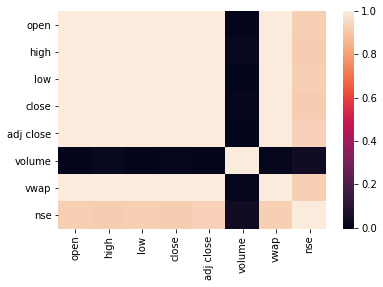

In [129]:
sns.heatmap(temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr())

In [130]:
abs(temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr()) > 0.7

open   high    low  close  adj close  volume   vwap    nse
open        True   True   True   True       True   False   True   True
high        True   True   True   True       True   False   True   True
low         True   True   True   True       True   False   True   True
close       True   True   True   True       True   False   True   True
adj close   True   True   True   True       True   False   True   True
volume     False  False  False  False      False    True  False  False
vwap        True   True   True   True       True   False   True   True
nse         True   True   True   True       True   False   True   True

##### There is very high multi-collinearity among the variables 'open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse'. So these are the candidates for PCA.

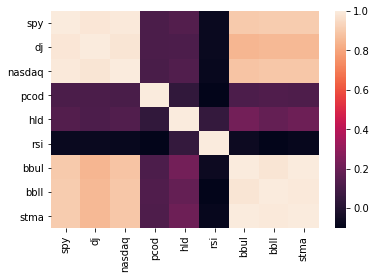

In [131]:
sns.heatmap(temp_stock1[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr())

In [132]:
abs(temp_stock1[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr()) > 0.7

spy     dj  nasdaq   pcod    hld    rsi   bbul   bbll   stma
spy      True   True    True  False  False  False   True   True   True
dj       True   True    True  False  False  False   True   True   True
nasdaq   True   True    True  False  False  False   True   True   True
pcod    False  False   False   True  False  False  False  False  False
hld     False  False   False  False   True  False  False  False  False
rsi     False  False   False  False  False   True  False  False  False
bbul     True   True    True  False  False  False   True   True   True
bbll     True   True    True  False  False  False   True   True   True
stma     True   True    True  False  False  False   True   True   True

##### There is very high multi-collinearity among the variables 'spy', 'dj', 'nasdaq', 'bbul', 'bbll', 'stma'.  So these are the candidates for PCA.

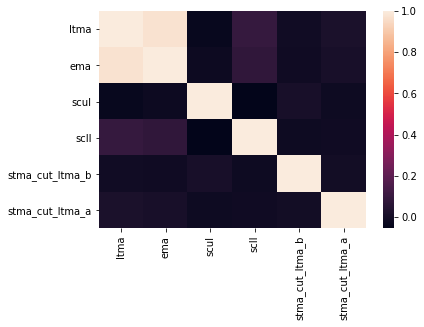

In [133]:
sns.heatmap(temp_stock1[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr())

In [134]:
abs(temp_stock1[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr()) > 0.7

ltma    ema   scul   scll  stma_cut_ltma_b  stma_cut_ltma_a
ltma              True   True  False  False            False            False
ema               True   True  False  False            False            False
scul             False  False   True  False            False            False
scll             False  False  False   True            False            False
stma_cut_ltma_b  False  False  False  False             True            False
stma_cut_ltma_a  False  False  False  False            False             True

##### There is very high multi-collinearity among the variables 'ltma', 'ema'.  So these are the candidates for PCA.

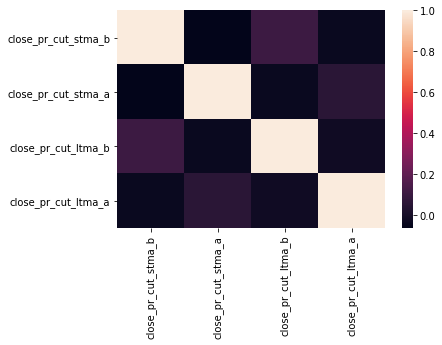

In [135]:
sns.heatmap(temp_stock1[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr())

In [136]:
abs(temp_stock1[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr()) > 0.7

close_pr_cut_stma_b  close_pr_cut_stma_a  \
close_pr_cut_stma_b                 True                False   
close_pr_cut_stma_a                False                 True   
close_pr_cut_ltma_b                False                False   
close_pr_cut_ltma_a                False                False   

                     close_pr_cut_ltma_b  close_pr_cut_ltma_a  
close_pr_cut_stma_b                False                False  
close_pr_cut_stma_a                False                False  
close_pr_cut_ltma_b                 True                False  
close_pr_cut_ltma_a                False                 True

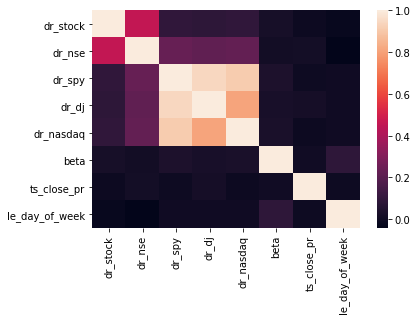

In [137]:
sns.heatmap(temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr())

In [138]:
abs(temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr()) > 0.7

dr_stock  dr_nse  dr_spy  dr_dj  dr_nasdaq   beta  \
dr_stock            True   False   False  False      False  False   
dr_nse             False    True   False  False      False  False   
dr_spy             False   False    True   True       True  False   
dr_dj              False   False    True   True       True  False   
dr_nasdaq          False   False    True   True       True  False   
beta               False   False   False  False      False   True   
ts_close_pr        False   False   False  False      False  False   
le_day_of_week     False   False   False  False      False  False   

                ts_close_pr  le_day_of_week  
dr_stock              False           False  
dr_nse                False           False  
dr_spy                False           False  
dr_dj                 False           False  
dr_nasdaq             False           False  
beta                  False           False  
ts_close_pr            True           False  
le_day_of_week        False            True

##### There is very high multi-collinearity among the variables 'dr_spy', 'dr_dj', 'dr_nasdaq'.  So these are the candidates for PCA.

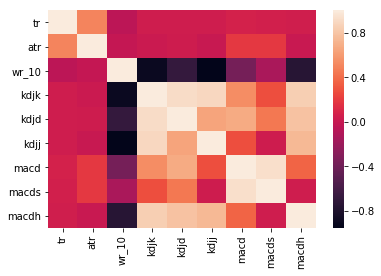

In [139]:
sns.heatmap(temp_stock1[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr())

In [140]:
abs(temp_stock1[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr()) > 0.7

tr    atr  wr_10   kdjk   kdjd   kdjj   macd  macds  macdh
tr      True  False  False  False  False  False  False  False  False
atr    False   True  False  False  False  False  False  False  False
wr_10  False  False   True   True  False   True  False  False   True
kdjk   False  False   True   True   True   True  False  False   True
kdjd   False  False  False   True   True  False  False  False   True
kdjj   False  False   True   True  False   True  False  False   True
macd   False  False  False  False  False  False   True   True  False
macds  False  False  False  False  False  False   True   True  False
macdh  False  False   True   True   True   True  False  False   True

##### There is very high multi-collinearity among the variables 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'. So these are the candidates for PCA.

### Data preparation for PCA
Variables for PCA: 'open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse', 'spy', 'dj', 'nasdaq', 'bbul', 'bbll', 'stma',
'ltma', 'ema', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'

In [141]:
y = temp_stock1['price_movmnt']
X = temp_stock1.drop(['price_movmnt'], axis=1)

In [142]:
vars_pca = ['open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse', 'spy', 'dj',         
         'nasdaq', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'dr_spy', 'dr_dj', 
         'dr_nasdaq', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']

In [143]:
pca_X = temp_stock1[vars_pca]
print('pca_X.shape', pca_X.shape)
pca_X.head()


pca_X.shape (1827, 25)


open         high          low        close    adj close  \
date                                                                          
2013-05-01  1650.199951  1659.949951  1630.000000  1644.449951  1429.050049   
2013-05-02  1644.949951  1672.000000  1611.000000  1613.849976  1402.458252   
2013-05-03  1613.849976  1624.449951  1587.150024  1611.400024  1400.329102   
2013-05-04  1613.849976  1624.449951  1587.150024  1611.400024  1400.329102   
2013-05-05  1613.849976  1624.449951  1587.150024  1611.400024  1400.329102   

               vwap          nse          spy            dj       nasdaq  \
date                                                                       
2013-05-01  1640.51  5930.200195  1582.699951  14700.950195  3299.129883   
2013-05-02  1642.40  5999.350098  1597.589966  14831.580078  3340.620117   
2013-05-03  1607.18  5944.000000  1614.420044  14973.959961  3378.629883   
2013-05-04  1607.18  5944.000000  1614.420044  14973.959961  3378.629883   
2013-05-05  1607.18  5944.000000  1614.420044  14973.959961  3378.629883   

              ...        dr_spy     dr_dj  dr_nasdaq      wr_10       kdjk  \
date          ...                                                            
2013-05-01    ...     -0.006198 -0.006405  -0.008051  21.767970  78.300257   
2013-05-02    ...      0.007331  0.007503   0.010197  43.518813  71.027234   
2013-05-03    ...      0.007331  0.007503   0.010197  45.041941  61.106396   
2013-05-04    ...      0.000000  0.000000   0.000000  58.735279  51.657953   
2013-05-05    ...      0.000000  0.000000   0.000000  67.238935  45.358990   

                 kdjd       kdjj       macd      macds      macdh  
date                                                               
2013-05-01  79.653446  75.593879  28.849184  11.888833  33.920702  
2013-05-02  76.778042  59.525617  28.371739  15.185414  26.372650  
2013-05-03  71.554160  40.210869  27.478921  17.644115  19.669611  
2013-05-04  64.922091  25.129676  26.466266  19.408546  14.115441  
2013-05-05  58.401057  19.274856  25.371264  20.601089   9.540349  

[5 rows x 25 columns]

In [144]:
# Standardise the data of independent variables and then create PCA dimensions on this distribution

pca_X_std = StandardScaler().fit_transform(pca_X)
print(pca_X_std.shape)
pca_X_std


(1827, 25)


array([[-1.93098228, -1.96297209, -1.92515281, ...,  0.65301663,
         0.12041558,  1.58790414],
       [-1.9394691 , -1.94352473, -1.95611435, ...,  0.63764159,
         0.23516297,  1.23566278],
       [-1.98974335, -2.02026492, -1.99497919, ...,  0.60889037,
         0.32074544,  0.92285523],
       ...,
       [ 1.49268105,  1.45361682,  1.45535834, ...,  0.27356701,
         0.65973838, -0.95797486],
       [ 1.43270738,  1.41012277,  1.47580933, ...,  0.24828708,
         0.58245049, -0.82400623],
       [ 1.43270738,  1.41012277,  1.47580933, ...,  0.222506  ,
         0.51504682, -0.71799329]])

In [145]:
other_X = X.drop(pca_X.columns.tolist(), axis=1)
print('other_X.shape', other_X.shape)
other_X.head()


other_X.shape (1827, 19)


volume      pcod        hld        rsi  scul  scll  \
date                                                               
2013-05-01  329076.0  5.750000  30.214966  84.635051     0     0   
2013-05-02  472417.0  0.500000  61.000000  76.094814     0     0   
2013-05-03  203386.0  0.000000  37.299927  75.485869     0     0   
2013-05-04  203386.0  2.449952  37.299927  75.485869     0     0   
2013-05-05  203386.0  2.449952  37.299927  79.854865     0     0   

            stma_cut_ltma_b  stma_cut_ltma_a  close_pr_cut_stma_b  \
date                                                                
2013-05-01                0                0                    0   
2013-05-02                0                0                    0   
2013-05-03                0                0                    0   
2013-05-04                0                0                    0   
2013-05-05                0                0                    0   

            close_pr_cut_stma_a  close_pr_cut_ltma_b  close_pr_cut_ltma_a  \
date                                                                        
2013-05-01                    0                    0                    0   
2013-05-02                    0                    0                    0   
2013-05-03                    0                    0                    0   
2013-05-04                    0                    0                    0   
2013-05-05                    0                    0                    0   

            dr_stock    dr_nse  beta  ts_close_pr  le_day_of_week         tr  \
date                                                                           
2013-05-01  0.000000  0.000000  0.00  1558.486174               6  31.199951   
2013-05-02 -0.015468  0.009225  0.00  1558.451607               4  61.000000   
2013-05-03 -0.001518 -0.007849 -0.13  1557.629607               0  37.299927   
2013-05-04  0.000000  0.000000 -0.00  1557.648275               2  37.299927   
2013-05-05  0.000000  0.000000  0.00  1558.087862               3  37.299927   

                  atr  
date                   
2013-05-01  52.778195  
2013-05-02  53.365542  
2013-05-03  52.217862  
2013-05-04  51.152178  
2013-05-05  50.162631

In [146]:
# Standardise the data of independent variables and then create PCA dimensions on this distribution

other_X_std = StandardScaler().fit_transform(other_X)
print(other_X_std.shape)
other_X_std


(1827, 19)


array([[-0.25832606,  0.08927476, -1.2908705 , ...,  1.5       ,
        -1.2659633 , -0.99902655],
       [ 0.5229268 , -0.15844319, -0.09180454, ...,  0.5       ,
        -0.13841182, -0.95387043],
       [-0.94337551, -0.18203538, -1.01491382, ..., -1.5       ,
        -1.03515707, -1.04210584],
       ...,
       [ 1.06269278,  2.12526998,  0.35416691, ...,  0.        ,
         0.29482267,  0.45950939],
       [-0.87303926,  0.64369112, -1.18434381, ..., -1.        ,
        -1.06542409,  0.2659359 ],
       [-0.87303926, -0.24101584, -1.18434381, ...,  1.        ,
        -1.19974813,  0.06669385]])

### Feature Extraction for PCA

In [147]:
# Transpose the 'pca_X_std' and then calculate covariance matrix

cov_matrix = np.cov(pca_X_std.T)
print(cov_matrix.shape)

print('\nCovariance Matrix for independent variables \n\n%s', cov_matrix)


(25, 25)

Covariance Matrix for independent variables 

%s [[ 1.00054765e+00  9.99296341e-01  9.99493942e-01  9.98265736e-01
   9.96848012e-01  9.99247789e-01  9.22760500e-01  9.03694996e-01
   8.51791154e-01  8.88210198e-01  9.90568085e-01  9.86345814e-01
   9.92839935e-01  9.59282548e-01  9.95423209e-01 -8.42831142e-03
   1.16757253e-02 -1.38293584e-02  3.57864792e-02 -2.38963833e-02
  -2.11233728e-02 -2.22903254e-02  5.47082062e-02  5.01774113e-02
   2.05908835e-03]
 [ 9.99296341e-01  1.00054765e+00  9.99180880e-01  9.99493373e-01
   9.97687237e-01  1.00003599e+00  9.21133752e-01  9.01805154e-01
   8.49528193e-01  8.86140203e-01  9.89919152e-01  9.84460011e-01
   9.91581245e-01  9.57233505e-01  9.94342784e-01 -5.55414360e-03
   1.47631804e-02 -1.12223308e-02  1.60120691e-02 -1.21568898e-02
  -1.52422194e-02 -6.32322245e-03  6.08166220e-02  5.27148525e-02
   1.37481580e-02]
 [ 9.99493942e-01  9.99180880e-01  1.00054765e+00  9.99597959e-01
   9.98183229e-01  1.00008683e+00  9.23541025

In [148]:
# Decompose the covariance matrix into eigen-values and eigen-vectors

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)


In [149]:
# Eigen-value is the magnitude(measure of signal) of each vector(independent variable)
# Here magnitude(measure of signal) refers to the variance captured by each dimension(independent variable) in mathematical space

print(eig_vals.shape)
eig_vals


(25,)


array([1.43105507e+01, 4.69382209e+00, 2.78571680e+00, 1.80301022e+00,
       5.06213709e-01, 3.73101558e-01, 1.92172191e-01, 1.43334491e-01,
       6.80434401e-02, 4.52558544e-02, 2.79967866e-02, 1.94886366e-02,
       1.58716820e-02, 1.22199392e-02, 7.16941750e-03, 3.88951370e-03,
       2.04165333e-03, 1.50429193e-03, 1.28905019e-03, 5.76918859e-04,
       2.29093664e-04, 9.25541258e-05, 1.00524492e-04, 1.13035144e-14,
       1.57767039e-16])

In [150]:
# eigenvectors of the covariance matrix represent the principal components(the directions of maximum variance)
# Eigen-vector consists of cosine values of each independent variable on every other dimension

print(eig_vecs.shape)
eig_vecs


(25, 25)


array([[-2.61352562e-01, -3.49046079e-02, -9.48983864e-03,
        -5.28739338e-02,  1.09760404e-01, -1.06387617e-01,
         3.13701681e-03, -8.87492160e-03,  5.54677965e-02,
        -6.72579205e-02,  2.42434091e-03, -7.55959560e-02,
        -4.01079646e-02,  5.25833464e-02, -3.86376548e-02,
        -1.07208012e-01,  4.82312765e-01,  5.18505825e-01,
         1.28593207e-01,  5.31783228e-01,  2.35412858e-01,
        -1.22253495e-01, -4.78212077e-02,  6.82533358e-08,
        -1.29393189e-10],
       [-2.61042774e-01, -4.11923803e-02, -7.96910371e-03,
        -4.93296512e-02,  1.24404581e-01, -9.40843730e-02,
         1.02282150e-02, -3.97044478e-02,  4.87019994e-02,
        -1.32401829e-02, -2.63109975e-03, -6.95013871e-02,
        -5.13569483e-02,  1.16837591e-01, -7.87485730e-03,
        -8.87476041e-02,  3.29029670e-01, -6.43431645e-03,
        -7.37704628e-01, -1.54573068e-01, -2.52754199e-01,
         2.38296676e-01,  2.70128452e-01, -1.25086159e-07,
         2.37132511e-10],
    

In [151]:
print("Eigen Values:")
pd.DataFrame(eig_vals).T

Eigen Values:


0         1         2        3         4         5         6   \
0  14.310551  4.693822  2.785717  1.80301  0.506214  0.373102  0.192172   

         7         8         9       ...            15        16        17  \
0  0.143334  0.068043  0.045256      ...       0.00389  0.002042  0.001504   

         18        19        20        21        22            23  \
0  0.001289  0.000577  0.000229  0.000093  0.000101  1.130351e-14   

             24  
0  1.577670e-16  

[1 rows x 25 columns]

In [152]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('\nCumulative Variance Explained\n\n', cum_var_exp)


Cumulative Variance Explained

 [ 57.21087158  75.97588339  87.11265161  94.320745    96.34449154
  97.83608091  98.60434893  99.17737308  99.44939787  99.6303222
  99.74224805  99.82015993  99.88361191  99.93246491  99.96112689
  99.97667643  99.98483857  99.99085244  99.99600582  99.99831224
  99.99922811  99.99962999 100.         100.         100.        ]


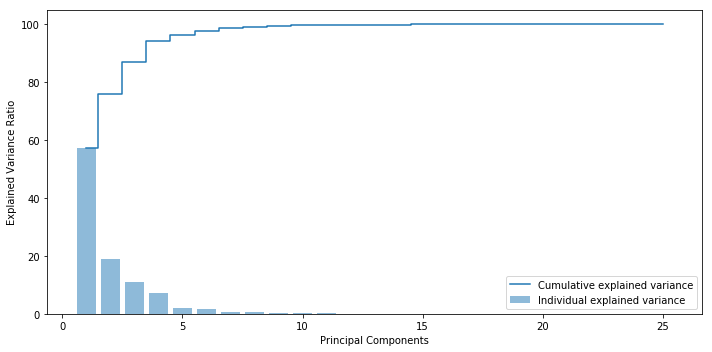

In [153]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


### Observation:
Here the first 5 principal components capture 94.23% of the explained cumulative variance among all the independent variables. Choosing 5 PCs will help to maximize the signal of the data, while preserving the low-dimensionality.

After 5 PCs the the difference between consecutive cumulative variances are getting converged, so k=5 would be preferable.

#### Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace( k≤d )

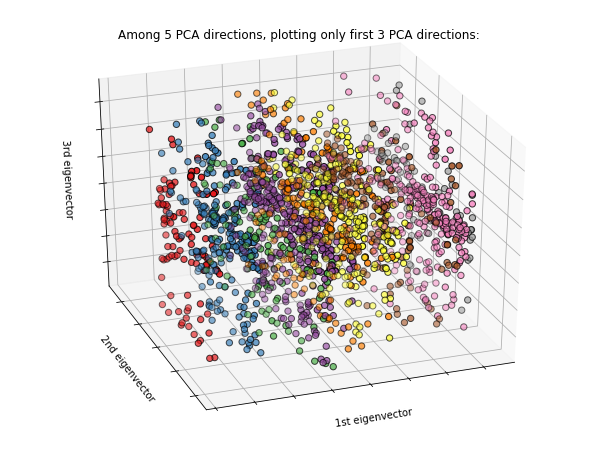

In [154]:
# Here k = 5 from the above observation

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# Build PCA on the entire dataset(all IVs)
X_reduced = PCA(n_components=5).fit_transform(pca_X_std)

# Plotting only first 3 PCA dimensions  
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=pca_X.iloc[:,0].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Among 5 PCA directions, plotting only first 3 PCA directions:")

ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Construct a projection matrix W from the "top" k eigenvectors.

In [155]:
#Sort the eigen-pairs by descending order of the eigen-values

eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(14.310550707609856,
  array([-0.26135256, -0.26104277, -0.26137052, -0.26104236, -0.26227195,
         -0.26117712, -0.25279136, -0.25135192, -0.23997606, -0.24823967,
         -0.26111946, -0.26124317, -0.26232517, -0.25932855, -0.2625935 ,
          0.00042343, -0.0052693 ,  0.00184928, -0.02117872,  0.02379684,
          0.02537758,  0.01735252,  0.01088895,  0.0095535 ,  0.01214141])),
 (4.693822094310369,
  array([-0.03490461, -0.04119238, -0.03954536, -0.04540452, -0.03952739,
         -0.04245701, -0.00193527, -0.00108939,  0.00203768,  0.00154526,
          0.00576154,  0.01823542,  0.01190752,  0.02619484,  0.00160614,
         -0.0249921 , -0.01695122, -0.02686643,  0.40870691, -0.45050957,
         -0.42122014, -0.39458036, -0.30657048, -0.19011967, -0.39243052])),
 (2.7857168045012433,
  array([-9.48983864e-03, -7.96910371e-03, -9.06859006e-03, -7.17109270e-03,
         -5.63179556e-03, -8.25203062e-03,  1.17256089e-04,  1.74568989e-02,
          2.12160005e-02,  1.387924

In [156]:
#Collect five eigen-vectors that correspond to the five largest values to capture about 94.23% of the variance 

W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis]))

# W is 25*5 dimensional projection matrix from the top five eigen-vectors
print('Shape of W = ', W.shape)
print('\nProjection matrix W:\n\n', W)


Shape of W =  (25, 5)

Projection matrix W:

 [[-2.61352562e-01 -3.49046079e-02 -9.48983864e-03 -5.28739338e-02
   1.09760404e-01]
 [-2.61042774e-01 -4.11923803e-02 -7.96910371e-03 -4.93296512e-02
   1.24404581e-01]
 [-2.61370515e-01 -3.95453568e-02 -9.06859006e-03 -4.74128687e-02
   1.18824181e-01]
 [-2.61042357e-01 -4.54045210e-02 -7.17109270e-03 -4.29120129e-02
   1.34945481e-01]
 [-2.62271950e-01 -3.95273893e-02 -5.63179556e-03 -2.88322541e-02
   9.07273630e-02]
 [-2.61177123e-01 -4.24570109e-02 -8.25203062e-03 -4.65321719e-02
   1.27567796e-01]
 [-2.52791360e-01 -1.93527090e-03  1.17256089e-04  7.63470740e-02
  -1.82383108e-01]
 [-2.51351917e-01 -1.08938912e-03  1.74568989e-02  7.80175792e-02
  -3.42244622e-01]
 [-2.39976058e-01  2.03767996e-03  2.12160005e-02  8.57930105e-02
  -4.47174337e-01]
 [-2.48239670e-01  1.54526236e-03  1.38792491e-02  8.95749445e-02
  -3.72206539e-01]
 [-2.61119461e-01  5.76154288e-03 -5.55040604e-03 -4.63362866e-02
   1.42348258e-01]
 [-2.61243169e-01  

In [157]:
"""Using the projection matrix W transform the entire (1707, 25) dimensional dataset(pca_X_std) onto 
the five principal components by calculating the matrix dot product"""

pca_X_trnsfrmd = pca_X_std.dot(W)
print(pca_X_trnsfrmd.shape)
pca_X_trnsfrmd


(1827, 5)


array([[ 7.45112135, -2.186033  , -3.09192185,  0.60697111, -0.81039949],
       [ 7.37226306, -1.63295209,  3.14742558, -0.20532686, -1.00474326],
       [ 7.36538332, -0.97551584,  3.16512428, -0.48914858, -1.09042264],
       ...,
       [-6.17161953,  0.20585124, -0.21831175, -0.61654471, -0.53970565],
       [-6.09312572, -0.21348176, -2.9393543 , -0.14835739, -0.34671611],
       [-6.0877879 , -0.52768503, -0.22283197, -0.18304728, -0.34112946]])

### Data preparation for model building

In [158]:
X = np.hstack((pca_X_trnsfrmd, other_X_std))
print('X.shape', X.shape)
X

X.shape (1827, 24)


array([[ 7.45112135, -2.186033  , -3.09192185, ...,  1.5       ,
        -1.2659633 , -0.99902655],
       [ 7.37226306, -1.63295209,  3.14742558, ...,  0.5       ,
        -0.13841182, -0.95387043],
       [ 7.36538332, -0.97551584,  3.16512428, ..., -1.5       ,
        -1.03515707, -1.04210584],
       ...,
       [-6.17161953,  0.20585124, -0.21831175, ...,  0.        ,
         0.29482267,  0.45950939],
       [-6.09312572, -0.21348176, -2.9393543 , ..., -1.        ,
        -1.06542409,  0.2659359 ],
       [-6.0877879 , -0.52768503, -0.22283197, ...,  1.        ,
        -1.19974813,  0.06669385]])

### Model building

In [159]:
# Import suite of algorithms

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [160]:
# Create objects of required models

models = []
models.append(("LR", LogisticRegression()))
models.append(("GNB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("LDA",  LinearDiscriminantAnalysis()))
models.append(("QDA",  QuadraticDiscriminantAnalysis()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear", SVC(kernel="linear")))
models.append(("SVM RBF", SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging", BaggingClassifier()))
models.append(("Calibrated classifier", CalibratedClassifierCV()))
models.append(("GradientBoosting", GradientBoostingClassifier()))
models.append(("LinearSVC", LinearSVC()))
models.append(("Ridge", RidgeClassifier()))
models.append(("MLP", MLPClassifier()))

#models

### Time-Series-Split 

In [161]:
from sklearn.model_selection import TimeSeriesSplit

num_splits = 10

tscv = TimeSeriesSplit(n_splits = num_splits)
print(tscv)  

k=1
grid_result = []
    
for name, model in models:
    
    if name=='KNN':
        print('Model name: ', name)
        k_values = np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29])        
        param_grid = dict(n_neighbors=k_values)
        grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=None)

        for train_index, test_index in tscv.split(X): 

            print("\n\n*************** Split-{} ***************".format(k))    
            print("\nTRAIN-set:", train_index, "\n\nTEST-set:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            #print(model.get_params().keys())
            grid_result = grid.fit(X_train, y_train)           

            # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
            print('\ngrid_result.best_score_', grid_result.best_score_)
            print('\ngrid_result.best_params_', grid_result.best_params_)
            means = grid_result.cv_results_['mean_test_score']
            stds = grid_result.cv_results_['std_test_score']
            params = grid_result.cv_results_['params']
            print('\n')
            for mean, stdev, param in zip(means, stds, params):
                print("%f (%f) with: %r" % (mean, stdev, param))
            
            print("\n\n*************** KNN accuracy ***************") 
            knn = KNeighborsClassifier(n_neighbors=int(grid_result.best_params_['n_neighbors']))
            knn.fit(X_train, y_train)
            knn_accuracy = knn.score(X_test, y_test)
            print("\nknn_accuracy = ", knn_accuracy)           
                    
        k+=1
        
        #elif name=='LR':
            


TimeSeriesSplit(max_train_size=None, n_splits=10)
Model name:  KNN


*************** Split-1 ***************

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166] 

TEST-set: [167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 2


grid_result.best_score_ 0.793984962406015

grid_result.best_params_ {'n_neighbors': 5}


0.792481 (0.017308) with: {'n_neighbors': 1}
0.787970 (0.019788) with: {'n_neighbors': 3}
0.793985 (0.017464) with: {'n_neighbors': 5}
0.784962 (0.024361) with: {'n_neighbors': 7}
0.774436 (0.015157) with: {'n_neighbors': 9}
0.769925 (0.019986) with: {'n_neighbors': 11}
0.759398 (0.012355) with: {'n_neighbors': 13}
0.756391 (0.006903) with: {'n_neighbors': 15}
0.754887 (0.013416) with: {'n_neighbors': 17}
0.753383 (0.008183) with: {'n_neighbors': 19}
0.747368 (0.000538) with: {'n_neighbors': 21}
0.744361 (0.002444) with: {'n_neighbors': 23}
0.744361 (0.002444) with: {'n_neighbors': 25}
0.735338 (0.001565) with: {'n_neighbors': 27}
0.736842 (0.003696) with: {'n_neighbors': 29}


*************** KNN accuracy ***************

knn_accuracy =  0.8012048192771084


*************** Split-1 ***************

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  2


grid_result.best_score_ 0.8264794383149449

grid_result.best_params_ {'n_neighbors': 3}


0.813440 (0.012293) with: {'n_neighbors': 1}
0.826479 (0.012429) with: {'n_neighbors': 3}
0.820461 (0.009807) with: {'n_neighbors': 5}
0.819458 (0.019082) with: {'n_neighbors': 7}
0.816449 (0.030628) with: {'n_neighbors': 9}
0.810431 (0.025406) with: {'n_neighbors': 11}
0.804413 (0.027545) with: {'n_neighbors': 13}
0.795386 (0.031793) with: {'n_neighbors': 15}
0.789368 (0.030005) with: {'n_neighbors': 17}
0.788365 (0.026115) with: {'n_neighbors': 19}
0.785356 (0.030390) with: {'n_neighbors': 21}
0.786359 (0.032020) with: {'n_neighbors': 23}
0.775326 (0.033218) with: {'n_neighbors': 25}
0.770311 (0.028295) with: {'n_neighbors': 27}
0.768305 (0.025906) with: {'n_neighbors': 29}


*************** KNN accuracy ***************

knn_accuracy =  0.7771084337349398


*************** Split-1 ***************

TRAIN-set: [   0    1    2 ... 1160 1161 1162] 

TEST-set: [1163 1164 1165 1166 1167 1168 1169 117

In [162]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)
print(tscv)  
TimeSeriesSplit(max_train_size=None, n_splits=3)

k=1
for train_index, test_index in tscv.split(X): 
    
    print("\n\n*************** Split-{} ***************".format(k))    
    print("\nTRAIN-set:", train_index, "\n\nTEST-set:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("\n\n\n*************** {}-fold validation ***************\n".format(k))
    # Find accuracy of models
    results = []
    for name, model in models:
        cv_result = cross_val_score(model, X_train, y_train, scoring = "accuracy")
        results.append(tuple([name, cv_result.mean(), cv_result.std()]))
        
    results.sort(key=lambda x: x[1], reverse = True)    
    for i in range(len(results)):
        print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))
        
    k+=1
    
    


TimeSeriesSplit(max_train_size=None, n_splits=10)


*************** Split-1 ***************

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166] 

TEST-set: [167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 21

AdaBoost             99.70 (+/-) 0.21 
Bagging              99.70 (+/-) 0.21 
GradientBoosting     99.40 (+/-) 0.21 
Random Forest        99.25 (+/-) 0.42 
DecisionTree         98.50 (+/-) 1.49 
LinearSVC            98.05 (+/-) 0.85 
SVM Linear           96.99 (+/-) 0.85 
LR                   95.49 (+/-) 1.27 
Calibrated classifier 95.49 (+/-) 0.97 
MLP                  95.34 (+/-) 1.18 
LDA                  91.43 (+/-) 2.89 
Ridge                91.12 (+/-) 2.80 
SVM RBF              90.83 (+/-) 0.78 
KNN                  79.39 (+/-) 1.75 
GNB                  71.29 (+/-) 20.45 
QDA                  68.27 (+/-) 7.16 


*************** Split-5 ***************

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78

DecisionTree         99.80 (+/-) 0.28 
AdaBoost             99.80 (+/-) 0.28 
Bagging              99.80 (+/-) 0.28 
GradientBoosting     99.30 (+/-) 0.62 
Random Forest        99.20 (+/-) 0.62 
LinearSVC            97.79 (+/-) 0.29 
SVM Linear           97.59 (+/-) 0.00 
Calibrated classifier 96.29 (+/-) 0.79 
MLP                  94.98 (+/-) 0.75 
LR                   94.78 (+/-) 0.51 
SVM RBF              92.48 (+/-) 1.22 
LDA                  91.58 (+/-) 1.49 
Ridge                91.17 (+/-) 1.35 
KNN                  82.05 (+/-) 0.98 
QDA                  70.51 (+/-) 3.32 
GNB                  51.56 (+/-) 4.38 


*************** Split-7 ***************

TRAIN-set: [   0    1    2 ... 1160 1161 1162] 

TEST-set: [1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176
 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190
 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204
 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216